## Module 5 Final Project
Student Name: Hazel Donaldson <br>
Student Pace: Part-time <br>
Project Due Date: <br>
Instructor Name: Victor Geislinger

## Introduction
In the past decade, the number of ways small companies and individuals can fund their projects has grown considerably. In addition to savings, bank loans, friend and family funding, crowdfunding has grown in popularity. The crowdfunding platform, Kickstarter, was created in 2009 and has an all or nothing funding model. This means that a project is only funded if it reaches its goal amount; otherwise no money is given by the backers of the project. 

A wide variety of factors contribute to the success or failure of a project, both in general and on Kickstarter. Some of these factors can be quantified, which allows for the creation of a model that can predict whether a project will fail or succeed. The aim of this project is to construct such a model and analyze Kickstarter data, in order to assist potential content creators to assess whether Kickstarter will be a viable funding option for them and what their chances of success are.

The dataset used in this project was downloaded as .csv file from a webscrape done by a webscraping site Web Robots. This dataset contains information about projects hosted on Kickstarter from April 2009 to late 2019.

# Obtaining the data
In this section, the dataset, revelant libraries and functions will be imported.

In [1]:
#Importing revelant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import glob #To read all the csv files in the directory
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
import itertools
import time
import xgboost as xgb

The most recent Kickstarter dataset from web robots(dated 11/14/2019) is stored in 56 seperate .csv files. Below we will create a list of all the files and concenate them into one dataframe:

In [2]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('data/Kickstarter*.csv')], ignore_index = True)

In [3]:
df.head(3)

backers_count                                              blurb  \
0             85  Help support the legendary B.O.O.G.A. mutant v...   
1              0  Handmade Organic comfortable trendy clothes fo...   
2             98  In NYC, 2 days before the U.N. Climate Summit,...   

                                            category  \
0  {"id":53,"name":"Public Art","slug":"art/publi...   
1  {"id":264,"name":"Childrenswear","slug":"fashi...   
2  {"id":53,"name":"Public Art","slug":"art/publi...   

   converted_pledged_amount country country_displayable_name  created_at  \
0                      6223      US        the United States  1434317481   
1                         0      CA                   Canada  1471976279   
2                      5667      US        the United States  1407432996   

                                             creator currency currency_symbol  \
0  {"id":1120701030,"name":"Shalin Scupham","is_r...      USD               $   
1  {"id":2039752660,"name":"Cassandra Derosa","is...      CAD               $   
2  {"id":627800435,"name":"LigoranoReese","slug":...      USD               $   

   ...                                               slug  \
0  ...  thunder-gumbo-art-car-burning-man-2015-repairs...   
1  ...                                   little-d-threads   
2  ...  dawn-of-the-anthropocene-public-art-ice-sculpture   

                                          source_url  spotlight  staff_pick  \
0  https://www.kickstarter.com/discover/categorie...       True       False   
1  https://www.kickstarter.com/discover/categorie...      False       False   
2  https://www.kickstarter.com/discover/categorie...       True        True   

        state  state_changed_at  static_usd_rate  \
0  successful        1438323004         1.000000   
1    canceled        1472164799         0.774623   
2  successful        1412170599         1.000000   

                                                urls usd_pledged  \
0  {"web":{"project":"https://www.kickstarter.com...      6223.0   
1  {"web":{"project":"https://www.kickstarter.com...         0.0   
2  {"web":{"project":"https://www.kickstarter.com...      5667.0   

        usd_type  
0  international  
1       domestic  
2  international  

[3 rows x 38 columns]

In [4]:
#how many projects are in the dataset?
len(df)

211424

From the above code, we can see that there are 211,424 projects stored in the dataframe.

# Scrubbing the data
In this section, we will clean and pre-process the data so it is ready for EDA and modelling

In [5]:
#check the columns
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type'],
      dtype='object')

In [6]:
#Checking column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211424 entries, 0 to 211423
Data columns (total 38 columns):
backers_count               211424 non-null int64
blurb                       211416 non-null object
category                    211424 non-null object
converted_pledged_amount    211424 non-null int64
country                     211424 non-null object
country_displayable_name    211424 non-null object
created_at                  211424 non-null int64
creator                     211424 non-null object
currency                    211424 non-null object
currency_symbol             211424 non-null object
currency_trailing_code      211424 non-null bool
current_currency            211424 non-null object
deadline                    211424 non-null int64
disable_communication       211424 non-null bool
friends                     444 non-null object
fx_rate                     211424 non-null float64
goal                        211424 non-null float64
id                          211

Description of each column: <br>
backers_count: number of people who contributed to each project <br>
blurb: description of the project <br>
category: contains type of project and sub-category <br>
converted_pledged_amount: amount of money pledged <br>
country: country project creator is from <br>
country_displayable_name : same as above <br>
created_at: date and time project was intially created on Kickstarter <br>
creator: Name of project creator and other information eg., their Kickstarter id <br>
currency: original currency the project goal was denominated in <br>
currency_symbol: symbol the original currency the project goal was denominated in <br>
currency_trailing_code: code of the original currency the project goal was denominated in <br>
current_currency: currency the project goal was converted to <br>
deadline: date and time project will close for donations <br>
disable_communication: whether or not project creator disable communication with backers <br>
friends: unclear <br>
fx_rate: foreign exchange rate between original currency and current_currency <br>
goal: funding goal<br>
id: id number of project <br>
is_backing: unclear <br>
is_starrable: whether or not a project can be starred (liked and shared) by users <br>
is_starred: whether or not project is starred (liked and shared) by users <br>
launched_at: date and time project was launched for funding <br>
location: the town or city of project creator <br>
name: name of project <br>
permissions: unclear <br>
photo: contains a link and information to the project's photos <br>
pledged: amount of pledges in current_currency <br>
profile: details about project's profile, including id number <br>
slug: name of project with hypens instead of spaces <br>
source_url: url of project's category <br>
spotlight: after a project has been successful, it is spotlighted on Kickstarter's website <br>
staff_pick: whether or not project was highlighted as a staff pick after project was launched <br>
state: whether or not project was successful, failed, was cancelled, launched or went live <br>
state_changed_at: date and time project's state changed <br>
static_usd_rate: conversion rate between current_currency and USD <br>
urls: url to project's page <br>
usd_pledged: amount pledged in USD <br>
usd_type: domestic or international <br>
Some of the columns with few non-null entries, can be dropped.

In [7]:
df.drop(['friends', 'is_backing', 'permissions'], axis = 1, inplace =True)

A few of the other columns can also be dropped because they don't suit the purposes of this project. This includes: <br>
converted_pledged_amount: most of the currencies are in USD. will use usd_pledged instead <br>
creator: most of the projects are created by multiple people so it's not useful to categorize projects <br>
currency: since will be using USD as primary currency, it's not neccessary to keep original currency <br>
currency_symbol: same as above <br>
currency_trailing_code: same as above <br>
current_currency: same as above <br>
fx_rate: doesn't always convert to the dollar so static_usd_rate will be used instead because it's all one currency <br>
photo: image processing is beyond the scope of project <br>
profile: contains information found in other columns (id,state, dates) <br>
slug: just the names with hyphens instead of spaces <br>
spotlight: only contains projects that are successful and will be highly correlated with successful projects <br>
source_url: not useful because each is as unique as an id <br>
state_changed_at: is the same as deadline for most projects with exception of projects that were cancelled(those projects aren't used in this analysis) <br>
urls: same as source url <br>
usd_type: not clear what this column means <br>

In [8]:
df.drop(['converted_pledged_amount', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency',
        'fx_rate','photo','is_starred','profile','pledged', 'slug', 'source_url', 'state_changed_at','spotlight', 'urls', 'usd_type'], axis = 1, inplace = True)

Next the columns with dates and times need to be converted:

In [9]:
#convert dates from unix to datetimes
convert_cols = ['created_at','deadline', 'launched_at']
for col in convert_cols:
    df[col] = pd.to_datetime(df[col], origin = 'unix', unit = 's')

In [10]:
#timeline of projects
print(f"The dataset contains projects added to Kickstarter between {min(df.created_at).strftime('%d %B %Y')} and {max(df.created_at).strftime('%d %B %Y')}.")

The dataset contains projects added to Kickstarter between 22 April 2009 and 13 November 2019.


The individual columns will be preprocessed and additional features will be engineered if necessary.

### Blurb
At the moment, natural language processing is outside the scope of this project. But the length of the blurb is important to whether backers will fund a project (eg., a longer blurb are more or less preferrable to backers). The original blurb feature will be dropped.

In [11]:
df['blurb_length'] = df['blurb'].str.split().str.len()
#drop blurb column
df.drop('blurb', axis = 1, inplace = True)

### Category

In [12]:
df.category.unique()

array(['{"id":53,"name":"Public Art","slug":"art/public art","position":9,"parent_id":1,"color":16760235,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/art/public%20art"}}}',
       '{"id":264,"name":"Childrenswear","slug":"fashion/childrenswear","position":3,"parent_id":9,"color":16752598,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/fashion/childrenswear"}}}',
       '{"id":51,"name":"Software","slug":"technology/software","position":11,"parent_id":16,"color":6526716,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/technology/software"}}}',
       '{"id":314,"name":"Spaces","slug":"food/spaces","position":11,"parent_id":10,"color":16725570,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/food/spaces"}}}',
       '{"id":345,"name":"DIY","slug":"crafts/diy","position":3,"parent_id":26,"color":16744876,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/crafts/d

In [13]:
#what does the category column look like?
df.iloc[0]['category']

'{"id":53,"name":"Public Art","slug":"art/public art","position":9,"parent_id":1,"color":16760235,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/art/public%20art"}}}'

In [14]:
#find subcategories
f = lambda x: x['category'].split('/')[1].split('"," position')[0]
df['sub_category'] = df.apply(f, axis = 1)
# Extracting the relevant category section from the string, and replacing the original category variable
f = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
df['category'] = df.apply(f, axis=1)
f = lambda x: x['category'].split('","position"')[0] # Some categories do not have a sub-category, so do not have a '/' to split with
df['category'] = df.apply(f, axis=1)

In [15]:
df.head()

backers_count    category country country_displayable_name  \
0             85         art      US        the United States   
1              0     fashion      CA                   Canada   
2             98         art      US        the United States   
3              2  technology      GB       the United Kingdom   
4            307        food      GB       the United Kingdom   

           created_at            deadline  disable_communication     goal  \
0 2015-06-14 21:31:21 2015-07-31 06:10:04                  False   6000.0   
1 2016-08-23 18:17:59 2016-09-22 22:16:46                  False  15000.0   
2 2014-08-07 17:36:36 2014-10-01 13:36:39                  False   4500.0   
3 2016-07-27 07:43:59 2016-09-30 15:30:00                  False   3500.0   
4 2014-08-21 13:59:31 2015-09-06 23:00:00                  False  50000.0   

           id  is_starrable         launched_at  \
0   117424629         False 2015-07-01 06:10:04   
1   699034184         False 2016-08-23 22:16:46   
2    44517997         False 2014-08-22 13:36:39   
3  1196260883         False 2016-09-01 11:28:17   
4   647991009         False 2015-08-18 13:21:59   

                                            location  \
0  {"id":99999999,"name":"Black Rock City","slug"...   
1  {"id":8676,"name":"Edmonton","slug":"edmonton-...   
2  {"id":2459115,"name":"New York","slug":"new-yo...   
3  {"id":12602189,"name":"Staffordshire","slug":"...   
4  {"id":44418,"name":"London","slug":"london-gb"...   

                                                name  staff_pick       state  \
0  Bring the Thunder Gumbo Art Car to Burning Man...       False  successful   
1                        Little D Threads (Canceled)       False    canceled   
2  Dawn of the Anthropocene - Public Art Ice Scul...        True  successful   
3  Securing Systems with Hashicorp Vault - Online...       False      failed   
4        Mike and Ollie: 45 Camberwell Church Street        True  successful   

   static_usd_rate   usd_pledged  blurb_length  \
0         1.000000   6223.000000          22.0   
1         0.774623      0.000000           9.0   
2         1.000000   5667.000000          24.0   
3         1.310662    281.792410          20.0   
4         1.564891  78282.124892          19.0   

                                        sub_category  
0  public art","position":9,"parent_id":1,"color"...  
1  childrenswear","position":3,"parent_id":9,"col...  
2  public art","position":9,"parent_id":1,"color"...  
3  software","position":11,"parent_id":16,"color"...  
4  spaces","position":11,"parent_id":10,"color":1...

### Disable_communication

In [16]:
df.disable_communication.value_counts(normalize = True)

False    0.996968
True     0.003032
Name: disable_communication, dtype: float64

A majority of creators do not disable communications to potential backers. Because 99% of all project have this value for this variable, it will be dropped because it doesn't provide any relevant information.

In [17]:
df.drop('disable_communication', axis = 1, inplace = True)

### Goal

At the moment, the goal is recorded in native currencies. In order to allow for fair comparisons, all the currencies will be converted into dollars

In [18]:
df['usd_goal'] = round(df['goal'] * df['static_usd_rate'], 2)

In [19]:
#drop goal and static_usd_rate
df.drop(['goal', 'static_usd_rate'], axis = 1, inplace = True)

### id

In [20]:
df.id.unique()

array([ 117424629,  699034184,   44517997, ..., 1062645603,  628051333,
        338397503], dtype=int64)

In [21]:
#are there any duplicate projects?
print(f"Of all the {len(df)} projects in this dataset, there are {len(df[df.duplicated(subset = 'id')])} which are listed more than once. ")

Of all the 211424 projects in this dataset, there are 26889 which are listed more than once. 


### is_starrable

In [22]:
df.is_starrable.value_counts(normalize = True)

False    0.967927
True     0.032073
Name: is_starrable, dtype: float64

While only a small amount of projects are starrable(3%), this column will be kept because whether a project is saved or liked by a user can contribute to the success of a project. 

### Location

In [22]:
df.location.unique()

array(['{"id":99999999,"name":"Black Rock City","slug":"black-rock-city-nv","short_name":"Black Rock City, NV","displayable_name":"Black Rock City, NV","localized_name":"Black Rock City","country":"US","state":"NV","type":"Town","is_root":false,"expanded_country":"United States","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/black-rock-city-nv","location":"https://www.kickstarter.com/locations/black-rock-city-nv"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1573768726.55c43e5f7f04bb843ed002e50fc54f8150dec3d1&woe_id=99999999"}}}',
       '{"id":8676,"name":"Edmonton","slug":"edmonton-ca","short_name":"Edmonton, Canada","displayable_name":"Edmonton, Canada","localized_name":"Edmonton","country":"CA","state":"AB","type":"Town","is_root":false,"expanded_country":"Canada","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/edmonton-ca","location":"https://www.kickstarter.com/locations/edmonton-ca"},"api":{"nearby_pro

In [23]:
df.location.nunique()

15344

Because there a large number of location (which refers to cities/states) are we already have information about the project's origin country, this column can be dropped. One-hot encoding will not give any useful information with such a large number of locations.

In [24]:
df.drop('location', axis = 1, inplace = True)

In [ ]:
df.columns

### name

Similar to the blurb column, the project name column will be assessed for length of the project name is useful to the model. The original column will then be dropped.

In [25]:
df['name_length'] = df['name'].str.split().str.len()
df.drop('name', axis = 1, inplace = True)

### usd_pledged

In [26]:
df['usd_pledged'] = round(df['usd_pledged'], 2)

### New features

Some additional features will need to be created from existing features, which may predict whether a project was successfully funded. This includes the time between creation and launching, campaign length, date of creation, date of launch, date of deadline, launch time of day, creation time of day and average pledge per backer.

In [27]:
#time from creation to launch
df['creation_to_launch'] = df['launched_at'] - df['created_at']
df['creation_to_launch'] = df['creation_to_launch'].dt.round('d').dt.days
#campaign length
df['campaign_length'] = df['deadline'] - df['launched_at']
df['campaign_length'] = df['campaign_length'].dt.round('d').dt.days
#day of week of launch
df['launch_day'] = df['launched_at'].dt.weekday_name
#day of week of deadline
df['deadline_day'] = df['deadline'].dt.weekday_name
#launch month
df['launch_month'] = df['launched_at'].dt.month_name()
#deadline month
df['deadline_month'] = df['deadline'].dt.month_name()

In [28]:
# Launch time
df['launch_hour'] = df['launched_at'].dt.hour # Extracting hour from launched_at

def two_hour_launch(row):
    '''Creates two hour bins from the launch_hour column'''
    if row['launch_hour'] in (0,1):
        return '12am-2am'
    if row['launch_hour'] in (2,3):
        return '2am-4am'
    if row['launch_hour'] in (4,5):
        return '4am-6am'
    if row['launch_hour'] in (6,7):
        return '6am-8am'
    if row['launch_hour'] in (8,9):
        return '8am-10am'
    if row['launch_hour'] in (10,11):
        return '10am-12pm'
    if row['launch_hour'] in (12,13):
        return '12pm-2pm'
    if row['launch_hour'] in (14,15):
        return '2pm-4pm'
    if row['launch_hour'] in (16,17):
        return '4pm-6pm'
    if row['launch_hour'] in (18,19):
        return '6pm-8pm'
    if row['launch_hour'] in (20,21):
        return '8pm-10pm'
    if row['launch_hour'] in (22,23):
        return '10pm-12am'
    
df['launch_time'] = df.apply(two_hour_launch, axis=1) # Calculates bins from launch_time

df.drop('launch_hour', axis=1, inplace=True)

In [29]:
#Dealine time
df['deadline_hr'] = df['deadline'].dt.hour 

def two_hour_deadline(row):
    """Creates two hour bins for the deadline_hr column"""
    if row['deadline_hr'] in (0,1):
        return '12am-2am'
    if row['deadline_hr'] in (2,3):
        return '2am-4am'
    if row['deadline_hr'] in (4,5):
        return '4am-6am'
    if row['deadline_hr'] in (6,7):
        return '6am-8am'
    if row['deadline_hr'] in (8,9):
        return '8am-10am'
    if row['deadline_hr'] in (10,11):
        return '10am-12pm'
    if row['deadline_hr'] in (12,13):
        return '12pm-2pm'
    if row['deadline_hr'] in (14,15):
        return '2pm-4pm'
    if row['deadline_hr'] in (16, 17):
        return '4pm-6pm'
    if row['deadline_hr'] in (18, 19):
        return '6pm-8pm'
    if row['deadline_hr'] in (20,21):
        return '8pm-10pm'
    if row['deadline_hr'] in (22,23):
        return '10pm-12am'

In [30]:
df['deadline_time'] = df.apply(two_hour_deadline, axis = 1)
df.drop('deadline_hr', axis = 1, inplace = True)

In [31]:
#Mean pledge per backer
df['plegde_per_backer'] = round(df['usd_pledged']/df['backers_count'], 2)

### Checking for null values

In [32]:
df.isna().sum()

backers_count                   0
category                        0
country                         0
country_displayable_name        0
created_at                      0
deadline                        0
id                              0
is_starrable                    0
launched_at                     0
staff_pick                      0
state                           0
usd_pledged                     0
blurb_length                    8
sub_category                    0
usd_goal                        0
name_length                     0
creation_to_launch              0
campaign_length                 0
launch_day                      0
deadline_day                    0
launch_month                    0
deadline_month                  0
launch_time                     0
deadline_time                   0
plegde_per_backer           17312
dtype: int64

There are eight projects with no blurb length, these can be replaced with a 0.

In [33]:
df.blurb_length.fillna(0, inplace = True)

In [34]:
#Number of projects in different states
df.state.value_counts()

successful    119652
failed         75100
canceled        8681
live            7350
suspended        641
Name: state, dtype: int64

In [35]:
#keeping projects that either failed or succeeded
df = df[df['state'].isin(['successful', 'failed'])]

In [36]:
max(df.deadline)

Timestamp('2019-11-14 05:35:09')

### dealing with duplicates

In [37]:
duplicates = df[df.duplicated(subset = 'id')]
print(f"Of all the {len(df)} projects in this dataset, there are {len(df[df.duplicated(subset = 'id')])} which are listed one than once")
print(f"Oh these, {len(df[df.duplicated(subset = 'id')])} have every value in common between duplicates.")

Of all the 194752 projects in this dataset, there are 23670 which are listed one than once
Oh these, 23670 have every value in common between duplicates.


In [38]:
df.drop_duplicates(inplace = True)
len(df)

171098

In [39]:
print(len(df[df.duplicated(subset = 'id')]), "duplicated projects remain")
duplicated = df[df.duplicated(subset = 'id', keep = False)].sort_values(by = 'id')
duplicated

16 duplicated projects remain


backers_count     category country country_displayable_name  \
101629           1214          art      AU                Australia   
32969            1214          art      AU                Australia   
174839             70        music      AU                Australia   
172896             70        music      AU                Australia   
190901             19  photography      FR                   France   
106019             19  photography      FR                   France   
61085              17      fashion      GB       the United Kingdom   
3783               17      fashion      GB       the United Kingdom   
62526            4059        games      AT                  Austria   
124572           4059        games      AT                  Austria   
72857               0   journalism      FR                   France   
17428               0   journalism      FR                   France   
170925            338        games      CA                   Canada   
20656             338        games      CA                   Canada   
125266            218       design      IT                    Italy   
122265            218       design      IT                    Italy   
6872               95   technology      GB       the United Kingdom   
66286              95   technology      GB       the United Kingdom   
17929             377        games      AU                Australia   
142492            377        games      AU                Australia   
151885             26      fashion      CA                   Canada   
157939             26      fashion      CA                   Canada   
164362            185       design      CH              Switzerland   
159651            185       design      CH              Switzerland   
197451            283       design      JP                    Japan   
133041            283       design      JP                    Japan   
16122             156        music      NO                   Norway   
48345             156        music      NO                   Norway   
96223              73          art      AU                Australia   
17516              73          art      AU                Australia   
95156            1276       design      HK                Hong Kong   
205490           1276       design      HK                Hong Kong   

                created_at            deadline          id  is_starrable  \
101629 2019-01-11 21:53:32 2019-08-25 02:00:01   147077736         False   
32969  2019-01-11 21:53:32 2019-08-25 02:00:01   147077736         False   
174839 2019-05-13 23:06:59 2019-06-20 00:25:00   192145853         False   
172896 2019-05-13 23:06:59 2019-06-20 00:25:00   192145853         False   
190901 2016-05-10 08:26:30 2016-05-28 15:30:00   264602783         False   
106019 2016-05-10 08:26:30 2016-05-28 15:30:00   264602783         False   
61085  2018-08-09 15:49:21 2018-09-26 17:30:00   472255617         False   
3783   2018-08-09 15:49:21 2018-09-26 17:30:00   472255617         False   
62526  2019-04-24 10:17:24 2019-08-19 00:00:01   475378059         False   
124572 2019-04-24 10:17:24 2019-08-19 00:00:01   475378059         False   
72857  2018-01-17 00:41:52 2018-03-25 00:16:18   611664554         False   
17428  2018-01-17 00:41:52 2018-03-25 00:16:18   611664554         False   
170925 2019-05-29 21:15:58 2019-07-16 03:23:34   703313528         False   
20656  2019-05-29 21:15:58 2019-07-16 03:23:34   703313528         False   
125266 2019-01-02 14:22:14 2019-03-05 01:36:59   706444364         False   
122265 2019-01-02 14:22:14 2019-03-05 01:36:59   706444364         False   
6872   2019-07-16 20:52:13 2019-09-21 03:35:25   783957932         False   
66286  2019-07-16 20:52:13 2019-09-21 03:35:25   783957932         False   
17929  2018-11-02 04:16:07 2019-06-30 01:56:53  1249193340         False   
142492 2018-11-02 04:16:07 2019-06-30 01:56:53  1249193340         False   
151885 2018-05-16 18:47:15 2018-08-09 00:02:52  1600162410         F

Let's compare the rows with duplicated projects: 

In [40]:
#finding the duplicate ids 
dup_ids = duplicated.id.unique()
for i in dup_ids:
    index1 = duplicated[duplicated.id == i][:1].index.values
    index = duplicated[duplicated.id == i][1:2].index.values
    print(index1, index)
    

[101629] [32969]
[174839] [172896]
[190901] [106019]
[61085] [3783]
[62526] [124572]
[72857] [17428]
[170925] [20656]
[125266] [122265]
[6872] [66286]
[17929] [142492]
[151885] [157939]
[164362] [159651]
[197451] [133041]
[16122] [48345]
[96223] [17516]
[95156] [205490]


In [41]:
df.loc[101629] == df.loc[32969]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [42]:
df.loc[174839] == df.loc[172896]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [43]:
df.loc[190901] == df.loc[106019]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [44]:
df.loc[61085] == df.loc[3783]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [45]:
df.loc[62526] == df.loc[124572]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [46]:
df.loc[72857] == df.loc[17428]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                  True
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [47]:
df.loc[170925] == df.loc[20656]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [48]:
df.loc[125266] ==  df.loc[122265]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [49]:
df.loc[6872]  ==  df.loc [66286]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [50]:
df.loc[17929] == df.loc[142492]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [51]:
df.loc[151885] == df.loc[157939]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [52]:
df.loc[164362] == df.loc[159651]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [53]:
df.loc[197451] == df.loc[133041]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [54]:
df.loc[16122]  == df.loc[48345]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [55]:
df.loc[96223] == df.loc[17516]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

In [56]:
df.loc[95156] == df.loc[205490]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch           True
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
plegde_per_backer           False
dtype: bool

Most of the duplicates are in usd_goal and usd_plegded columns and the others are in pledge_per_backer and name_length columns. Because these differences are not very large, it doesn't matter which one is kept and the first one of each pair will be dropped.

In [57]:
df.drop_duplicates(subset = 'id', keep = 'first', inplace = True)

In [58]:
#set index as id
df.set_index('id', inplace = True)
df.head()

backers_count    category country country_displayable_name  \
id                                                                       
117424629              85         art      US        the United States   
44517997               98         art      US        the United States   
1196260883              2  technology      GB       the United Kingdom   
647991009             307        food      GB       the United Kingdom   
2139543977              1      crafts      CA                   Canada   

                    created_at            deadline  is_starrable  \
id                                                                 
117424629  2015-06-14 21:31:21 2015-07-31 06:10:04         False   
44517997   2014-08-07 17:36:36 2014-10-01 13:36:39         False   
1196260883 2016-07-27 07:43:59 2016-09-30 15:30:00         False   
647991009  2014-08-21 13:59:31 2015-09-06 23:00:00         False   
2139543977 2018-04-10 01:07:03 2018-05-10 01:52:00         False   

                   launched_at  staff_pick       state  ...  name_length  \
id                                                      ...                
117424629  2015-07-01 06:10:04       False  successful  ...           10   
44517997   2014-08-22 13:36:39        True  successful  ...            9   
1196260883 2016-09-01 11:28:17       False      failed  ...            9   
647991009  2015-08-18 13:21:59        True  successful  ...            7   
2139543977 2018-04-11 18:55:23       False      failed  ...            4   

            creation_to_launch campaign_length  launch_day  deadline_day  \
id                                                                         
117424629                   16              30   Wednesday        Friday   
44517997                    15              40      Friday     Wednesday   
1196260883                  36              29    Thursday        Friday   
647991009                  362              19     Tuesday        Sunday   
2139543977                   2              28   Wednesday      Thursday   

            launch_month  deadline_month launch_time deadline_time  \
id                                                                   
117424629           July            July     6am-8am       6am-8am   
44517997          August         October    12pm-2pm      12pm-2pm   
1196260883     September       September   10am-12pm       2pm-4pm   
647991009         August       September    12pm-2pm     10pm-12am   
2139543977         April             May     6pm-8pm      12am-2am   

           plegde_per_backer  
id                            
117424629              73.21  
44517997               57.83  
1196260883            140.90  
647991009             254.99  
2139543977             17.35  

[5 rows x 24 columns]

In [59]:
df.isna().sum()

backers_count                   0
category                        0
country                         0
country_displayable_name        0
created_at                      0
deadline                        0
is_starrable                    0
launched_at                     0
staff_pick                      0
state                           0
usd_pledged                     0
blurb_length                    0
sub_category                    0
usd_goal                        0
name_length                     0
creation_to_launch              0
campaign_length                 0
launch_day                      0
deadline_day                    0
launch_month                    0
deadline_month                  0
launch_time                     0
deadline_time                   0
plegde_per_backer           13991
dtype: int64

In [60]:
df.plegde_per_backer.fillna(0, inplace = True)

## Exploring Data

In this section, I will explore the data and draw useful insights 

In [61]:
#Key Statistics
df.describe()

backers_count   usd_pledged   blurb_length      usd_goal  \
count  171082.000000  1.710820e+05  171082.000000  1.710820e+05   
mean      128.684917  1.191783e+04      18.660379  3.937651e+04   
std       782.323627  9.028676e+04       5.217942  1.092421e+06   
min         0.000000  0.000000e+00       0.000000  1.000000e-02   
25%         3.000000  1.000000e+02      16.000000  1.500000e+03   
50%        26.000000  1.486010e+03      20.000000  5.000000e+03   
75%        85.000000  6.234000e+03      22.000000  1.252199e+04   
max    105857.000000  1.214344e+07      43.000000  1.523501e+08   

         name_length  creation_to_launch  campaign_length  plegde_per_backer  
count  171082.000000       171082.000000    171082.000000      171082.000000  
mean        5.702651           47.391993        32.766901          72.214622  
std         2.692022          132.768025        11.949183         136.777502  
min         1.000000            0.000000         1.000000           0.000000  
25%         4.000000            3.000000        30.000000          20.430000  
50%         6.000000           11.000000        30.000000          46.160000  
75%         8.000000           36.000000        35.000000          84.227500  
max        27.000000         3304.000000        98.000000       10000.000000

Some key things we can draw from the stats above are: <br>
The average fundraising goal is $3,937 <br>
The average pledge per backer is $1,1917 <br>
The average backer counter per project is 129 <br>
The average pledege per backer is $72 <br>
The average days a campaign ran is 33 days <br>

### How do successful and failed projects differ?

AttributeError: 'function' object has no attribute 'div'

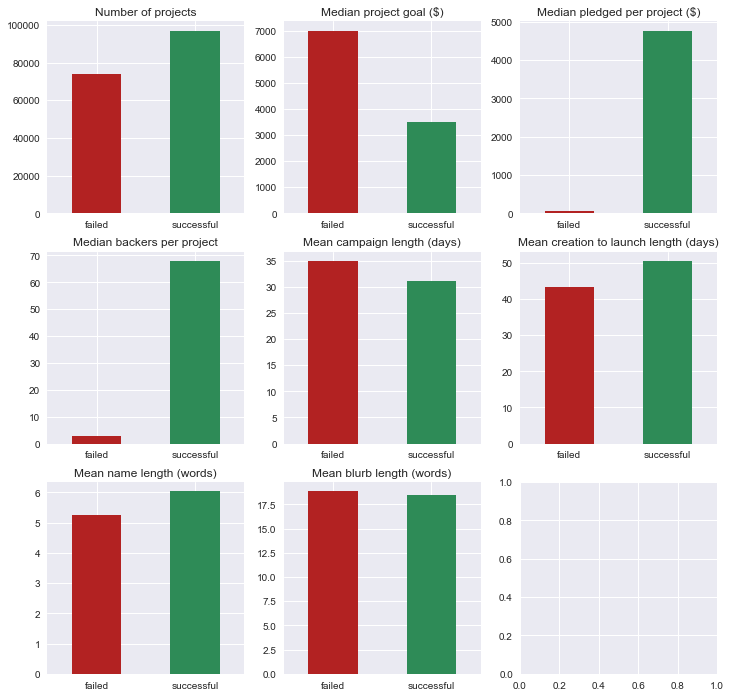

In [62]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12,12))

df['state'].value_counts(ascending=True).plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'], rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('state').usd_goal.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'], rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('state').usd_pledged.median().plot(kind='bar', ax=ax3, color=['firebrick', 'seagreen'], rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

df.groupby('state').backers_count.median().plot(kind='bar', ax=ax4, color=['firebrick', 'seagreen'], rot=0)
ax4.set_title('Median backers per project')
ax4.set_xlabel('')

df.groupby('state').campaign_length.mean().plot(kind='bar', ax=ax5, color=['firebrick', 'seagreen'], rot=0)
ax5.set_title('Mean campaign length (days)')
ax5.set_xlabel('')

df.groupby('state').creation_to_launch.mean().plot(kind='bar', ax=ax6, color=['firebrick', 'seagreen'], rot=0)
ax6.set_title('Mean creation to launch length (days)')
ax6.set_xlabel('')

df.groupby('state').name_length.mean().plot(kind='bar', ax=ax7, color=['firebrick', 'seagreen'], rot=0)
ax7.set_title('Mean name length (words)')
ax7.set_xlabel('')

df.groupby('state').blurb_length.mean().plot(kind='bar', ax=ax8, color=['firebrick', 'seagreen'], rot=0)
ax8.set_title('Mean blurb length (words)')
ax8.set_xlabel('')

#create a dataframe grouped by staff_pick with columns for failed or successful
pick_df = pd.get_dummies(df.set_index('staff_pick').state).groupby('staff_pick').sum
(pick_df.div(pick_df.sum(axis = 0), axis = 1)).iloc[0].plot(kind = 'bar', ax = ax9, color=['firebrick', 'seagreen'], rot = 0)
ax9.set_title('Proportion of Staff Picks')
ax9.set_xlabel('')

fig.subplots_adjust(hspace = 0.3)
plt.show()

Successful projects seem to have lower median project goals, the median amount is about half that of failed projects
The median pledge per project is surprisingly higher for successful projects compared to failed projects. This means that after successful projects meet their goal, they continue to gain funding and can become overfunded.
Successful projects have more backers than failed projects.
Successful projects seem to have slightly shorter campaign lengths, however successful projects take longer to launch
There is very little difference between the name length and blurb length between successful and failed projects.

### Has fundraising changed over time?

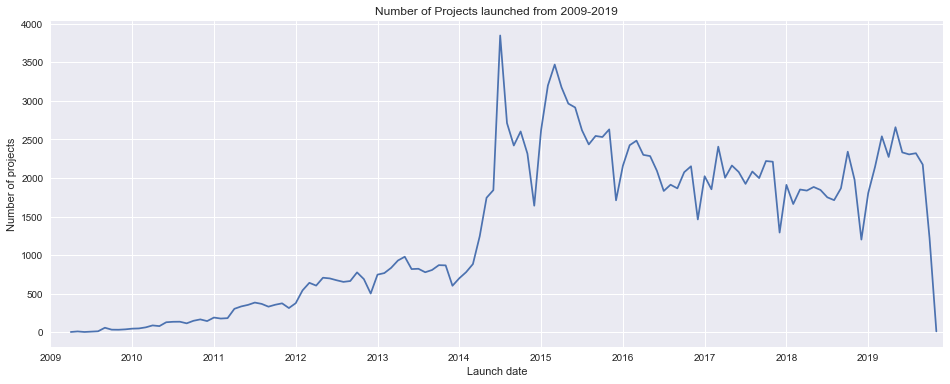

In [63]:
# plot number of projects launched per month
plt.figure(figsize =(16, 6))
df.set_index('launched_at').category.resample('MS').count().plot()
plt.xlim('2009-01-01', '2019-12-01')
plt.xlabel('Launch date')
plt.ylabel('Number of projects')
plt.title('Number of Projects launched from 2009-2019')
plt.show()

From the graph, we can see that is a steady growth from 2009 to 2014. Kickstarter expanded their business into other countries in 2012. Growth increased dramatically in 2014 and has remained at a high level ever since. 

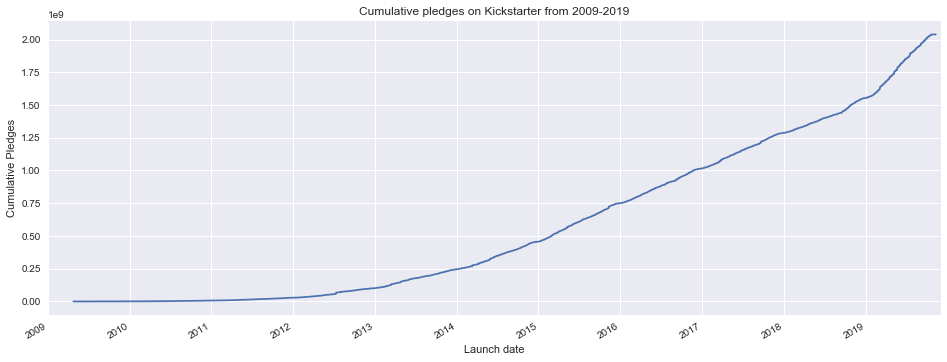

In [64]:
#amount of pledges on Kickstarter
plt.figure(figsize = (16, 6))
df.set_index('launched_at').sort_index().usd_pledged.cumsum().plot()
plt.xlim('2009-01-01', '2019-12-01')
plt.xlabel('Launch date')
plt.ylabel('Cumulative Pledges')
plt.title('Cumulative pledges on Kickstarter from 2009-2019')
plt.show()

In [65]:
print("Average amount pledged per project in each year, in $:")
print(round(df.set_index('launched_at').usd_pledged.resample('YS').mean(), 2))

Average amount pledged per project in each year, in $:
launched_at
2009-01-01     3730.18
2010-01-01     4737.86
2011-01-01     5867.14
2012-01-01     9631.24
2013-01-01    14675.19
2014-01-01     9286.50
2015-01-01     8937.98
2016-01-01    10616.33
2017-01-01    11167.50
2018-01-01    12204.78
2019-01-01    22282.54
Freq: AS-JAN, Name: usd_pledged, dtype: float64


The second graph and the table show a similar trend to the first graph: from 2014 onwards we can see higher variablity in average pledge amounts and lower amounts pledged between 2009-2014

In [66]:
print("Average fundraising goal per project in each year, in $:")
print(round(df.set_index('launched_at').usd_goal.resample('YS').mean(),2))

Average fundraising goal per project in each year, in $:
launched_at
2009-01-01     3993.99
2010-01-01     5220.47
2011-01-01     5953.68
2012-01-01     9188.76
2013-01-01    13269.67
2014-01-01    41620.41
2015-01-01    69087.72
2016-01-01    49746.37
2017-01-01    49533.82
2018-01-01    21888.95
2019-01-01    16906.76
Freq: AS-JAN, Name: usd_goal, dtype: float64


Examing the goal amount per project, we can see that 2009-2013 goals were lower but from 2014 onwards would steadily increase.

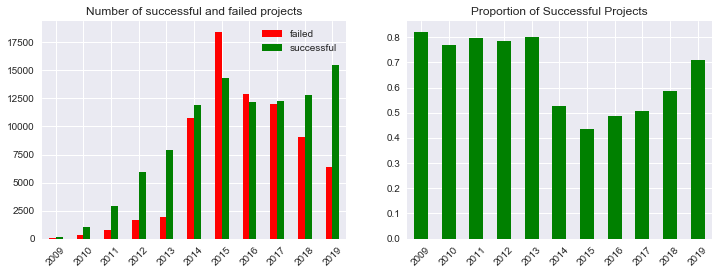

In [67]:
#create a dataframe grouped by year with columns for failed and successful projects
year_df= df.set_index('launched_at').state
year_df = pd.get_dummies(year_df).resample('YS').sum()

fig, ax = plt.subplots(1,2, figsize=(12,4))
year_df.plot.bar(ax=ax[0], color = ['red', 'green'])
ax[0].set_title('Number of successful and failed projects')
ax[0].set_xlabel('')
ax[0].set_xticklabels(list(range(2009, 2020)), rotation = 45)

year_df.div(year_df.sum(axis = 1), axis = 0).successful.plot(kind = 'bar', ax = ax[1], color = 'green')
ax[1].set_title('Proportion of Successful Projects')
ax[1].set_xlabel('')
ax[1].set_xticklabels(list(range(2009,2020)), rotation = 45)
plt.show()

Between 2009-2014, there was a higher proportion of successful projects and started to decrease in 2014 but seems to be rising slightly.

### What kinds of projects are successful?

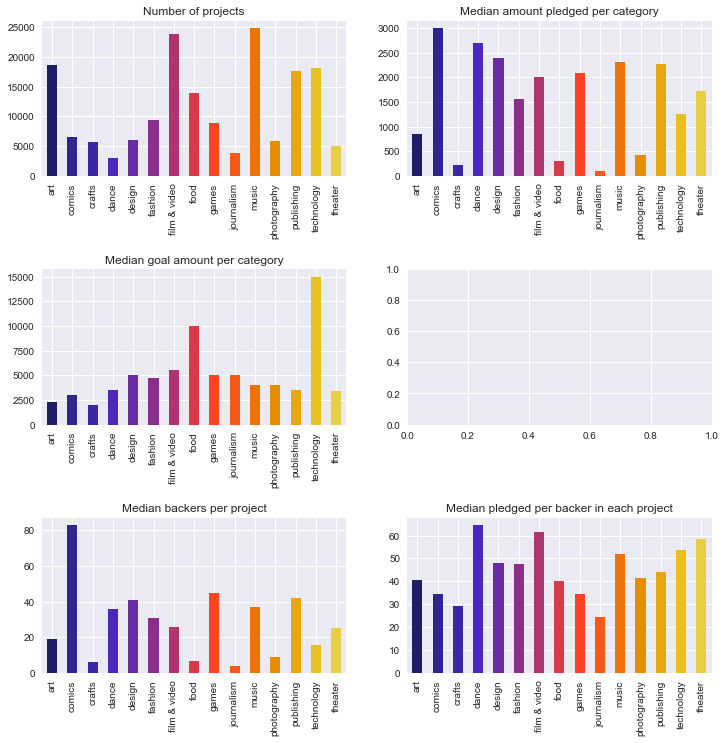

In [68]:
from matplotlib import cm
#create a dataframe grouped by category for failed and successful projects
cat_df = pd.get_dummies(df.set_index('category').state.groupby('category').sum())
color = cm.CMRmap(np.linspace(0.1,0.8,df.category.nunique())) # Setting a colormap
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize =(12,12))

df.groupby('category').category.count().plot(kind = 'bar', ax =ax1, color =color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('category').usd_pledged.median().plot(kind = 'bar', ax=ax2, color=color)
ax2.set_title('Median amount pledged per category')
ax2.set_xlabel('')

df.groupby('category').usd_goal.median().plot(kind = 'bar', ax=ax3, color=color)
ax3.set_title('Median goal amount per category')
ax3.set_xlabel('')

#cat_df.div(cat_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color=color) # Normalizes counts across rows
#ax4.set_title('Proportion of successful projects')
#ax4.set_xlabel('')



df.groupby('category').backers_count.median().plot(kind = 'bar', ax=ax5, color=color)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

df.groupby('category').plegde_per_backer.median().plot(kind = 'bar', ax=ax6, color=color)
ax6.set_title('Median pledged per backer in each project')
ax6.set_xlabel('')

fig.subplots_adjust(hspace = 0.6)
plt.show()

### where are project creators from and where are the successful projects originating from?

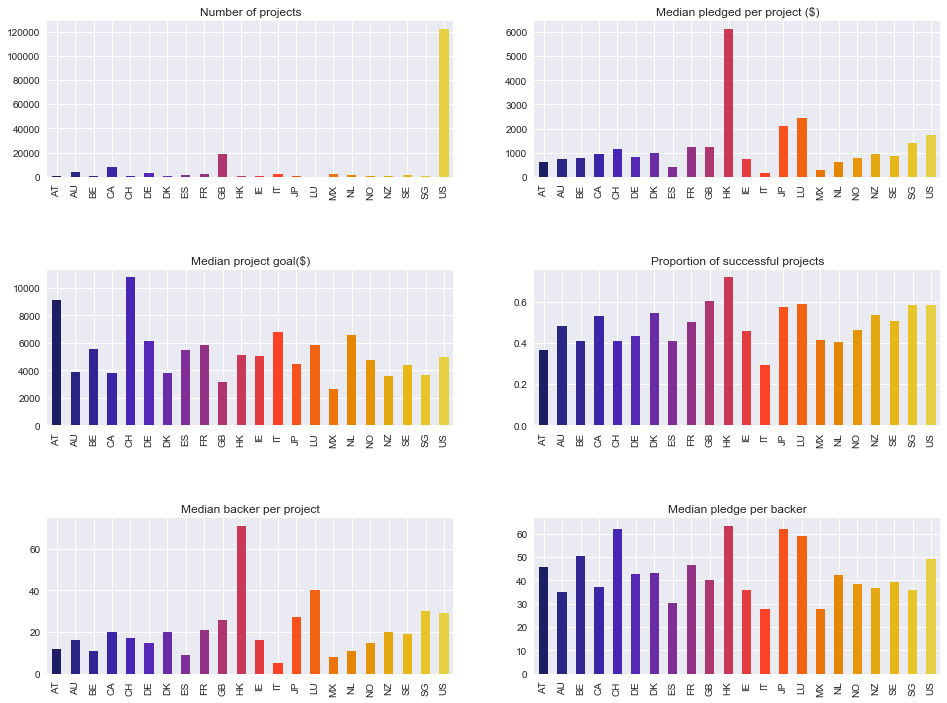

In [69]:
#create a new dataframe for countries with columns for failed and successful projects
country_df = pd.get_dummies(df.set_index('country').state).groupby('country').sum()
#plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(16,12))
color = cm.CMRmap(np.linspace(0.1, 0.8, df.country.nunique()))

df.groupby('country').country.count().plot(kind = 'bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('country').usd_pledged.median().plot(kind = 'bar', ax=ax2, color=color)
ax2.set_title('Median pledged per project ($)')
ax2.set_xlabel('')

df.groupby('country').usd_goal.median().plot(kind = 'bar', ax=ax3, color=color)
ax3.set_title('Median project goal($)')
ax3.set_xlabel('')

country_df.div(country_df.sum(axis = 1), axis = 0).successful.plot(kind='bar', ax=ax4, color=color)
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

df.groupby('country').backers_count.median().plot(kind = 'bar', ax=ax5, color=color)
ax5.set_title('Median backer per project')
ax5.set_xlabel('')

df.groupby('country').plegde_per_backer.median().plot(kind = 'bar', ax=ax6, color=color)
ax6.set_title('Median pledge per backer')
ax6.set_xlabel('')

fig.subplots_adjust(hspace = 0.6)
plt.show()

A large majority of the number of projects come out of the United States, with 6x the total number of projects compared to the United Kingdom(which was second). Switerland has the highest median project goals.
Projects from Hong Kong are most successful with highest proportion of successful projects, highest median backers per project, highest median pledged per project.

### when is the best time to launch a project?

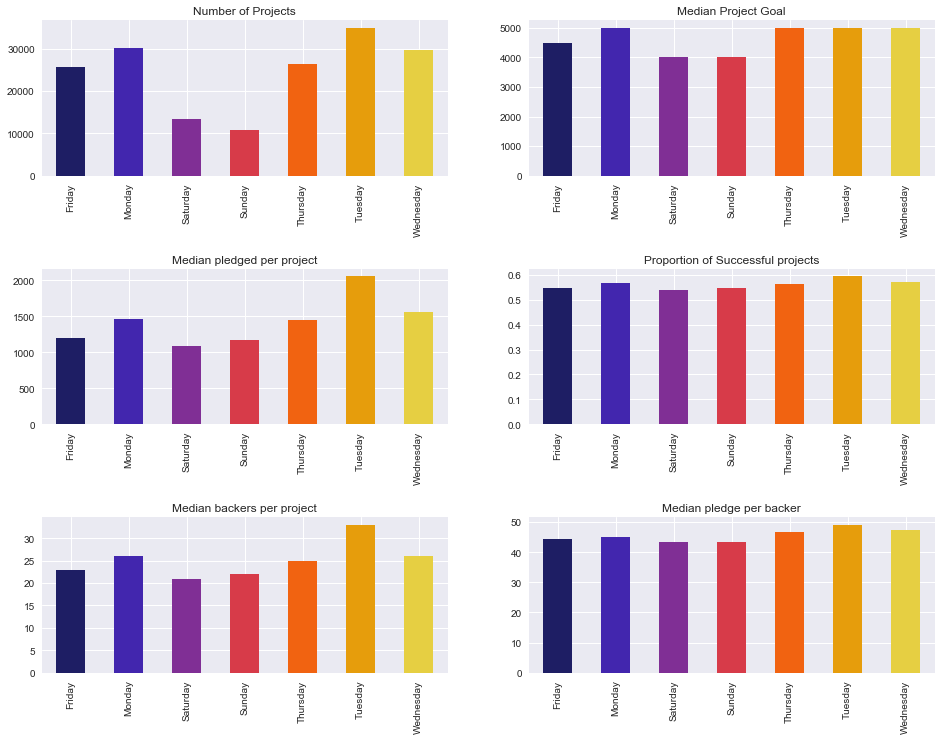

In [70]:
#create a dataframe grouped by day of project launch, with columns for failed and successful projects
day_df = pd.get_dummies(df.set_index('launch_day').state).groupby('launch_day').sum()
#plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(16, 12))
color = cm.CMRmap(np.linspace(0.1, 0.8, df.launch_day.nunique()))

df.groupby('launch_day').launch_day.count().plot(kind = 'bar', ax=ax1, color=color)
ax1.set_title('Number of Projects')
ax1.set_xlabel('')

df.groupby('launch_day').usd_goal.median().plot(kind = 'bar', ax=ax2, color = color)
ax2.set_title('Median Project Goal')
ax2.set_xlabel('')

df.groupby('launch_day').usd_pledged.median().plot(kind = 'bar', ax=ax3, color=color)
ax3.set_title('Median pledged per project')
ax3.set_xlabel('')

day_df.div(day_df.sum(axis = 1), axis = 0).successful.plot(kind = 'bar', ax=ax4, color = color)
ax4.set_title('Proportion of Successful projects')
ax4.set_xlabel('')

df.groupby('launch_day').backers_count.median().plot(kind = 'bar', ax=ax5, color=color)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

df.groupby('launch_day').plegde_per_backer.median().plot(kind= 'bar', ax=ax6, color=color)
ax6.set_title('Median pledge per backer')
ax6.set_xlabel('')

fig.subplots_adjust(hspace = 0.6)
plt.show()

Tuesday looks like the most popular day to launch a project, it has the highest number of projects launched, highest backers per project, highest median pledge per project. On the other hand, the weekends(esp. Friday) are the least popular days to launch a project, attracts less money, have less backers and recieve the smallest pledges per backer. This is surprising because they also tend to have smaller goals but tend recieve less funding and be less successful.

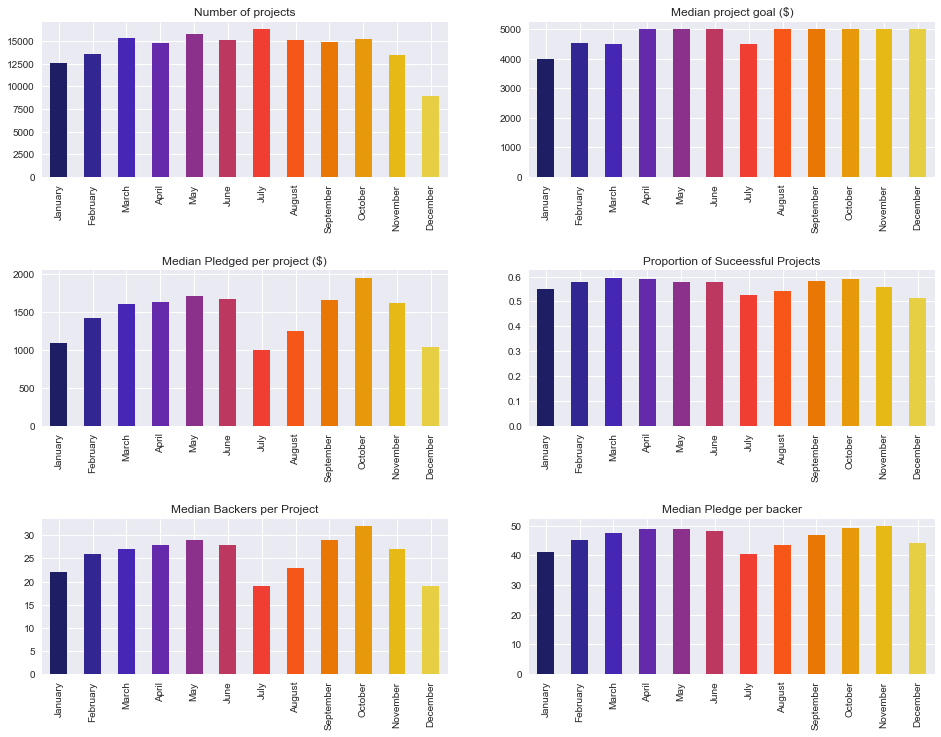

In [71]:
import calendar
#create a dataframe for launch month, with columns for failed and successful projects
month_df = pd.get_dummies(df.set_index('launch_month').state).groupby('launch_month').sum()

#plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(16, 12))
color = cm.CMRmap(np.linspace(0.1, 0.8, df.launch_month.nunique()))
months = list(calendar.month_name)[1:]

df.groupby('launch_month').launch_month.count().reindex(months).plot(kind = 'bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('launch_month').usd_goal.median().reindex(months).plot(kind = 'bar', ax=ax2, color=color)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('launch_month').usd_pledged.median().reindex(months).plot(kind = 'bar', ax=ax3, color=color)
ax3.set_title('Median Pledged per project ($)')
ax3.set_xlabel('')

month_df.div(month_df.sum(axis = 1), axis = 0).successful.reindex(months).plot(kind = 'bar', ax=ax4, color=color)
ax4.set_title('Proportion of Suceessful Projects')
ax4.set_xlabel('')

df.groupby('launch_month').backers_count.median().reindex(months).plot(kind = 'bar', ax=ax5, color=color)
ax5.set_title('Median Backers per Project')
ax5.set_xlabel('')

df.groupby('launch_month').plegde_per_backer.median().reindex(months).plot(kind = 'bar', ax=ax6, color=color)
ax6.set_title('Median Pledge per backer')
ax6.set_xlabel('')

fig.subplots_adjust(hspace = 0.6)
plt.show()

July is the most popular month to launch a project and December is the least popular time to launch a project. Both of these months have lowest success rates, lowest median backers per project, lowest pledge amounts and lowest pledges per backer.
Median goal sizes are all about the same expect for projects launched in January.
It looks like October is the best time to launch a project, it has: the highest amount of median backers per project, highest median pledge value per project. November seems to have the highest median pledge per backer.

In [ ]:
df.columns

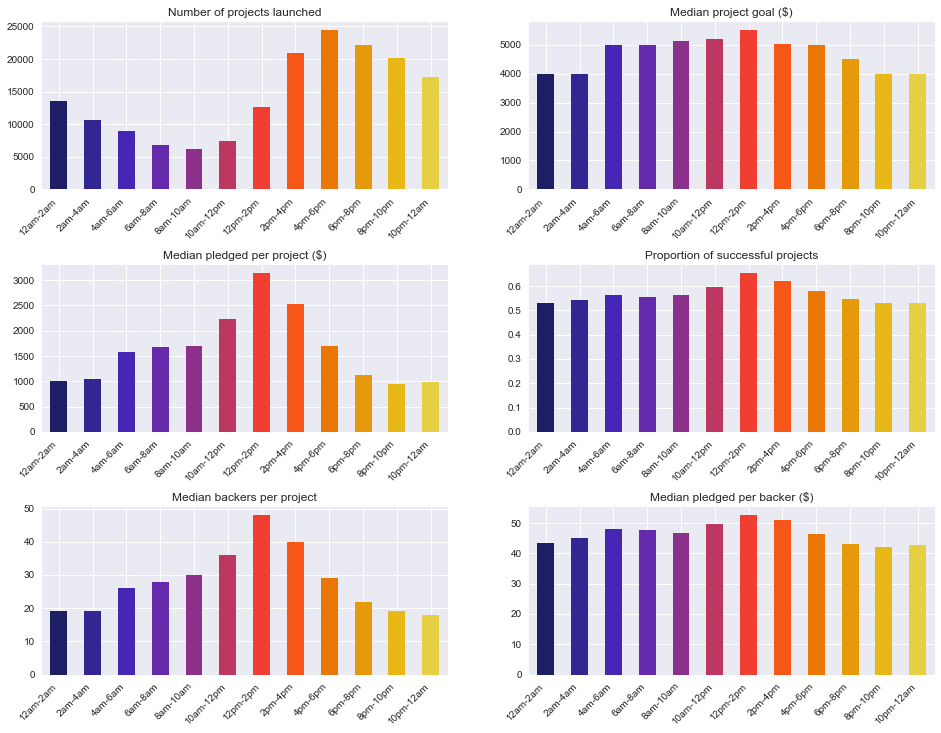

In [72]:
#create a dataframe grouped by launch time, with columns for failed and successful projects
time_df = pd.get_dummies(df.set_index('launch_time').state).groupby('launch_time').sum()

#plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(16, 12))
color = cm.CMRmap(np.linspace(0.1, 0.8, df.launch_time.nunique()))

times = ['12am-2am', '2am-4am', '4am-6am', '6am-8am', '8am-10am', '10am-12pm', '12pm-2pm', '2pm-4pm', '4pm-6pm', '6pm-8pm', '8pm-10pm', '10pm-12am']

df.groupby('launch_time').launch_time.count().reindex(times).plot(kind='bar', ax=ax1, color=color, rot=45)
ax1.set_title('Number of projects launched')
ax1.set_xlabel('')
ax1.set_xticklabels(labels=ax1.get_xticklabels(), ha='right')

df.groupby('launch_time').usd_goal.median().reindex(times).plot(kind='bar', ax=ax2, color=color, rot=45)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')
ax2.set_xticklabels(labels=ax2.get_xticklabels(), ha='right')

df.groupby('launch_time').usd_pledged.median().reindex(times).plot(kind='bar', ax=ax3, color=color, rot=45)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')
ax3.set_xticklabels(labels=ax3.get_xticklabels(), ha='right')

time_df.div(time_df.sum(axis=1), axis=0).successful.reindex(times).plot(kind='bar', ax=ax4, color=color, rot=45) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')
ax4.set_xticklabels(labels=ax4.get_xticklabels(), ha='right')

df.groupby('launch_time').backers_count.median().reindex(times).plot(kind='bar', ax=ax5, color=color, rot=45)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')
ax5.set_xticklabels(labels=ax5.get_xticklabels(), ha='right')

df.groupby('launch_time').plegde_per_backer.median().reindex(times).plot(kind='bar', ax=ax6, color=color, rot=45)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')
ax6.set_xticklabels(labels=ax6.get_xticklabels(), ha='right')

fig.subplots_adjust(hspace=0.45)
plt.show()

The most popular time to launch a project is between 4pm-6pm with 2pm-4pm being a close second (these times equate to being around 7am-9am EST and 9am-11am EST because the times above are in UTC/GMT).
Surprisingly, the median project goal per project and proportion of successful projects vary throughout the day. Projects launched between 12pm-2pm (7am-9am EST) tend to attract more backers, pledge amounts, pledge per backer.

### checking distributions

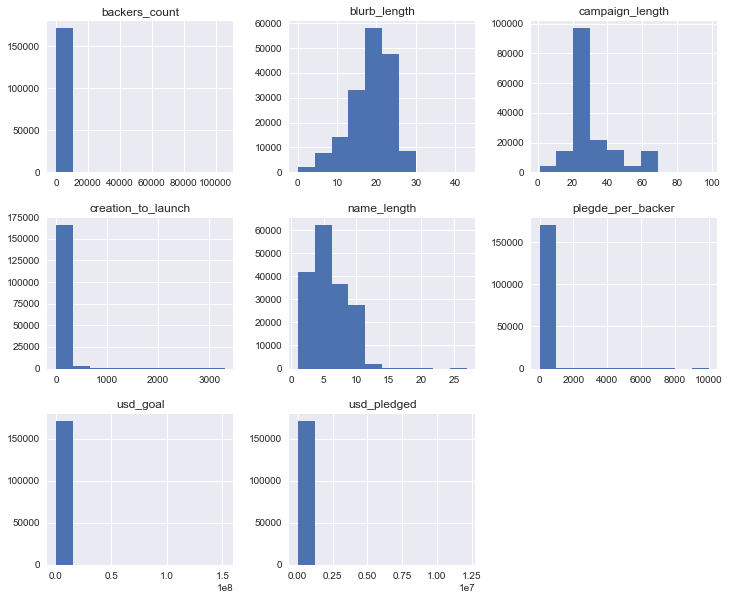

In [73]:
df[df.describe().columns].hist(figsize=(12,10));

Most of the continous numerical features, like blurb_length and campaign_length are positively skewed. Name_length seems to be negatively skewed. Since this is not an issue for machine learning models, these features will be kept as is and log-transformed in the first few models. Afterwards, the models will be rerun with log-transformed features to see that improves model performance.

### Prepping data for machine learning

Some of the features were kept for EDA purposes, but now need to be removed in order to create machine learning models. These features include datetime columns, features related to the outcome (e.g. the amount pledged and number of backers) rather than properties of the project itself(goal, category). Categorical features that would result in too many one-hot encoded features are also being removed. 

In [74]:
new_df = df.drop(['backers_count', 'created_at', 'deadline', 'is_starrable', 'launched_at', 'usd_pledged', 'sub_category',
                 'plegde_per_backer'], axis = 1)
new_df.head()

category country country_displayable_name  staff_pick  \
id                                                                    
117424629          art      US        the United States       False   
44517997           art      US        the United States        True   
1196260883  technology      GB       the United Kingdom       False   
647991009         food      GB       the United Kingdom        True   
2139543977      crafts      CA                   Canada       False   

                 state  blurb_length  usd_goal  name_length  \
id                                                            
117424629   successful          22.0   6000.00           10   
44517997    successful          24.0   4500.00            9   
1196260883      failed          20.0   4587.32            9   
647991009   successful          19.0  78244.57            7   
2139543977      failed          17.0   7887.84            4   

            creation_to_launch  campaign_length launch_day deadline_day  \
id                                                                        
117424629                   16               30  Wednesday       Friday   
44517997                    15               40     Friday    Wednesday   
1196260883                  36               29   Thursday       Friday   
647991009                  362               19    Tuesday       Sunday   
2139543977                   2               28  Wednesday     Thursday   

           launch_month deadline_month launch_time deadline_time  
id                                                                
117424629          July           July     6am-8am       6am-8am  
44517997         August        October    12pm-2pm      12pm-2pm  
1196260883    September      September   10am-12pm       2pm-4pm  
647991009        August      September    12pm-2pm     10pm-12am  
2139543977        April            May     6pm-8pm      12am-2am

Now, multicollinearity needs to be checked for assessing correlations between the predictor features, as this can cause some issues in our model.

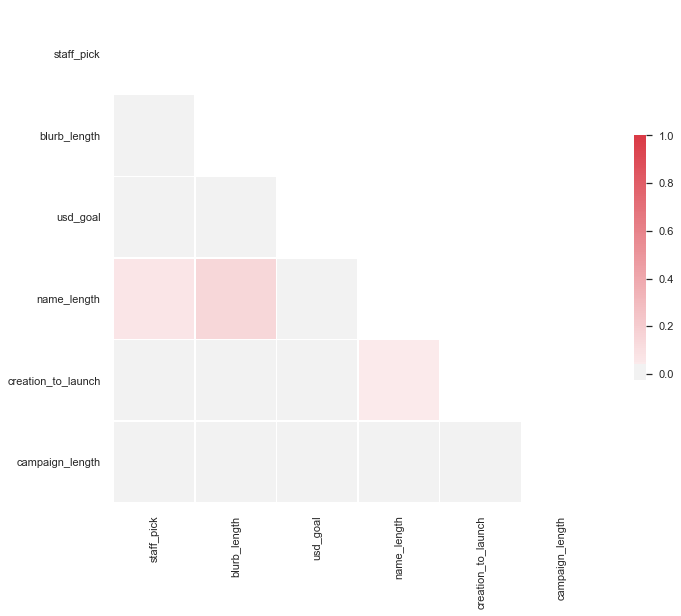

In [75]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = new_df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [76]:
corr

staff_pick  blurb_length  usd_goal  name_length  \
staff_pick            1.000000     -0.004863 -0.006662     0.067256   
blurb_length         -0.004863      1.000000 -0.001141     0.147125   
usd_goal             -0.006662     -0.001141  1.000000    -0.005835   
name_length           0.067256      0.147125 -0.005835     1.000000   
creation_to_launch    0.041652      0.003553  0.002203     0.046568   
campaign_length      -0.025515      0.027063  0.024597    -0.023034   

                    creation_to_launch  campaign_length  
staff_pick                    0.041652        -0.025515  
blurb_length                  0.003553         0.027063  
usd_goal                      0.002203         0.024597  
name_length                   0.046568        -0.023034  
creation_to_launch            1.000000         0.023958  
campaign_length               0.023958         1.000000

The correlation matrix shows that there are no issues with multicollinearity. Now, the dependent variable will be converted into 1s (successful) and 0s (failed).

In [77]:
new_df['state'] = new_df['state'].replace({'failed': 0, 'successful': 1})

In [78]:
#Converting boolean features into strings to include in one-hot encoding
new_df['staff_pick'] = new_df['staff_pick'].astype('str')

In [79]:
new_df = pd.get_dummies(new_df)

Finally, the dependent (y) and independent (X) features will be separated into two different data sets. Because the features are on different scales, the independent features will be scaled and normalized using StandardScaler.

In [80]:
X_unscaled = new_df.drop('state', axis = 1)
y = new_df.state

In [81]:
# Transforming the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()

C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


blurb_length  usd_goal  name_length  creation_to_launch  campaign_length  \
0      0.640028 -0.030553     1.596332           -0.236443        -0.231556   
1      1.023322 -0.031926     1.224863           -0.243975         0.605323   
2      0.256734 -0.031846     1.224863           -0.085804        -0.315244   
3      0.065087  0.035580     0.481925            2.369614        -1.152124   
4     -0.318207 -0.028825    -0.632482           -0.341890        -0.398932   

   category_art  category_comics  category_crafts  category_dance  \
0      2.861568        -0.200646        -0.185548       -0.133983   
1      2.861568        -0.200646        -0.185548       -0.133983   
2     -0.349459        -0.200646        -0.185548       -0.133983   
3     -0.349459        -0.200646        -0.185548       -0.133983   
4     -0.349459        -0.200646         5.389435       -0.133983   

   category_design  ...  deadline_time_12am-2am  deadline_time_12pm-2pm  \
0        -0.190283  ...               -0.301663               -0.251098   
1        -0.190283  ...               -0.301663                3.982506   
2        -0.190283  ...               -0.301663               -0.251098   
3        -0.190283  ...               -0.301663               -0.251098   
4        -0.190283  ...                3.314955               -0.251098   

   deadline_time_2am-4am  deadline_time_2pm-4pm  deadline_time_4am-6am  \
0               -0.31787              -0.328766              -0.310549   
1               -0.31787              -0.328766              -0.310549   
2               -0.31787               3.041677              -0.310549   
3               -0.31787              -0.328766              -0.310549   
4               -0.31787              -0.328766              -0.310549   

   deadline_time_4pm-6pm  deadline_time_6am-8am  deadline_time_6pm-8pm  \
0              -0.375352               4.026777              -0.358368   
1              -0.375352              -0.248338              -0.358368   
2              -0.375352              -0.248338              -0.358368   
3              -0.375352              -0.248338              -0.358368   
4              -0.375352              -0.248338              -0.358368   

   deadline_time_8am-10am  deadline_time_8pm-10pm  
0               -0.182356                -0.35111  
1               -0.182356                -0.35111  
2               -0.182356                -0.35111  
3               -0.182356                -0.35111  
4               -0.182356                -0.35111  

[5 rows x 128 columns]

# Modeling

In this section, several machine learning models for classification will be applied to the data, in order to create a model to classify projects as successes or failures. 
Becuase the two categories are about the same size, no measures will be taken to adjust imbalanced classes (like SMOTE)

In [82]:
#split the target and features into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

Now it's a good time to pick a metric to analyze how well the models have performance. For this project, I have chosen the F1 weighted average was chosen. The F1 score calculates the harmonic mean between recall and precision, and this measure does not give any preference to false positives or false negaitives (which would be bad in this case). The weighed average will be used because the two classes are about the same size, and we want to predict both successes and failures.

### Model: Basic Logistic regression

Logisitic regression can be used as a binary classifier in order to predict which category a data point falls into. First, we will create a baseline model to improve upon, with default parameters.

In [83]:
#create a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
#make predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [85]:
# Logistic regression scores
print('Logistic regression score for train set: ', round(logreg.score(X_train, y_train),5))
print('Logistic regression score for test set: ', round(logreg.score(X_test, y_test), 5))
print('\nClassification report:')
print(classification_report(y_test, y_hat_test))

Logistic regression score for train set:  0.71516
Logistic regression score for test set:  0.71677

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64     22075
           1       0.72      0.81      0.77     29250

   micro avg       0.72      0.72      0.72     51325
   macro avg       0.71      0.70      0.70     51325
weighted avg       0.72      0.72      0.71     51325



In [84]:
def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

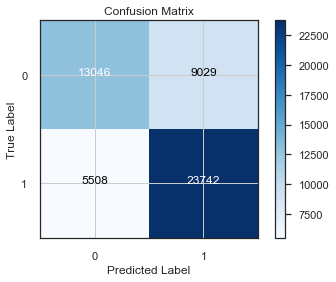

In [87]:
#Confusion matrix
plot_cf(y_test, y_hat_test)

C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC:  0.78197


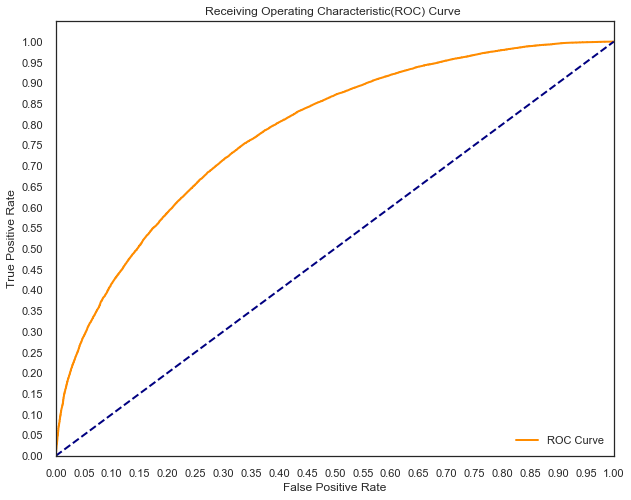

In [88]:
#Plot ROC-AUC curve
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: ',round(auc(fpr, tpr), 5))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
        lw=lw, label= 'ROC Curve')
plt.plot([0,1], [0,1], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0.0, 0.1])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiving Operating Characteristic(ROC) Curve ')
plt.legend(loc = 'lower right')
plt.show()

From above, we can see that the model has a fairly good accuracy score of 0.68 (averaged weighed f1 score), with similar scores for both train set and test set. However, the model does not seem to be able to predict failures well compared to the successes, and the recall rate (ability to predict positives out all the actual positives in a data set) are notably different for successes and failures. The AUC curve is high and being pulled to the top left section of the graph, which is a good sign. However, we can probably improve upon this.

In [89]:
len(X.columns)

128

### Principal Component Analysis and feature weightings

There are a large number of features in this data set(128). PCA (Prinicipal Components Analysis) can be used to reduce this into a smaller number of features which will still explain as much variation as possible.

In [90]:
pca = PCA()
pca.fit_transform(X)
explained_var = np.cumsum(pca.explained_variance_ratio_)

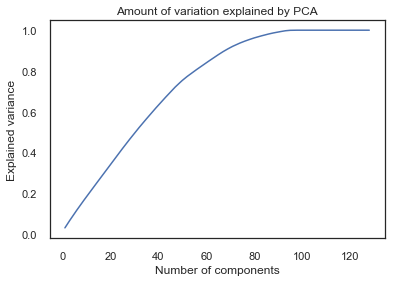

In [91]:
#plotting the amount of variance explained by PCA with different number of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA')
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

From the graph, there looks to be an elbow at about 80 components, but this will be checked below.

In [92]:
print("Number of components explaining 80% of variance: ", np.where(explained_var > 0.8)[0][0])
print("Number of components explaining 90% of variance: ", np.where(explained_var > 0.9)[0][0])
print("Number of components explaining 99% of variance: ", np.where(explained_var > 0.99)[0][0])

Number of components explaining 80% of variance:  55
Number of components explaining 90% of variance:  67
Number of components explaining 99% of variance:  89


The number of components to be used used will be assessed by running logistic regression models using each of these three number of components.

In [93]:
n_comps = [55, 67, 89]
for n in n_comps:
    pipe = Pipeline([('pca', PCA(n_components = n)), ('clf', LogisticRegression())])
    pipe.fit(X_train, y_train)
    print('\nNumber of components: ', n)
    print('\nScore:', round(pipe.score(X_test, y_test),5))

C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Number of components:  55

Score: 0.6693


C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Number of components:  67

Score: 0.69512


C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Number of components:  89

Score: 0.7147


The above results show us that the score is highest for 89 components

In [96]:
#feature weightings
pca = PCA(n_components = 89)
pca.fit_transform(X)
pca_89_comps = pd.DataFrame(pca.components_, columns = X.columns).T
pca_89_comps['mean_weight'] = pca_89_comps.iloc[:].abs().mean(axis = 1)
pca_89_comps.sort_values('mean_weight', ascending = False)

0         1         2  \
launch_time_2am-4am                         -0.077201  0.113434  0.007619   
deadline_time_2am-4am                       -0.098499  0.078334  0.027829   
launch_time_4am-6am                         -0.054753  0.109698  0.031920   
deadline_month_February                     -0.009583  0.081359 -0.136517   
launch_month_January                        -0.011793  0.081742 -0.150705   
deadline_time_12am-2am                      -0.065619  0.148254 -0.037949   
launch_time_12am-2am                        -0.069236  0.163642 -0.046372   
deadline_day_Thursday                        0.003918 -0.041929  0.091519   
launch_day_Monday                            0.001573 -0.078270 -0.000717   
launch_time_6am-8am                          0.033860  0.054860  0.047962   
deadline_month_June                          0.002848 -0.088035  0.015301   
launch_month_May                             0.005772 -0.088748  0.018170   
deadline_time_4am-6am                       -0.083724  0.112916  0.035763   
deadline_time_8pm-10pm                       0.003663 -0.005510 -0.132247   
deadline_time_8am-10am                       0.123789  0.016306  0.025926   
deadline_time_6am-8am                       -0.000625  0.061129  0.050897   
deadline_month_August                       -0.009663 -0.066020  0.024872   
deadline_day_Wednesday                       0.002976 -0.061433  0.000109   
launch_month_April                          -0.002766 -0.102534 -0.067034   
deadline_month_May                          -0.001592 -0.101839 -0.075120   
launch_month_February                       -0.008770  0.032641 -0.166964   
deadline_month_October                       0.008531  0.015873  0.186951   
deadline_time_12pm-2pm                       0.067537 -0.080227  0.116651   
launch_time_8am-10am                         0.135044  0.005806  0.021910   
launch_time_8pm-10pm                        -0.018170  0.013768 -0.138746   
deadline_time_2pm-4pm                        0.018528 -0.109159  0.193159   
launch_month_September                       0.006809  0.019207  0.185945   
deadline_month_March                        -0.009023  0.039014 -0.174974   
launch_month_November                        0.010502  0.124826  0.041565   
launch_month_July                           -0.008400 -0.064900  0.024332   
...                                               ...       ...       ...   
category_photography                         0.029391 -0.006795 -0.005675   
country_displayable_name_France              0.090317  0.008673  0.112500   
country_FR                                   0.090317  0.008673  0.112500   
country_ES                                   0.078498  0.025691  0.032131   
country_displayable_name_Spain               0.078498  0.025691  0.032131   
country_GB                                   0.308141 -0.312863 -0.223944   
country_displayable_name_the United Kingdom  0.308141 -0.312863 -0.223944   
country_NL                                   0.075973  0.011398  0.087755   
country_displayable_name_the Netherlands     0.075973  0.011398  0.087755   
country_CA                                   0.129800  0.243664 -0.042441   
country_displayable_name_Canada              0.129800  0.243664 -0.042441   
country_displayable_name_Sweden              0.063942  0.026276  0.003229   
country_SE                                   0.063942  0.026276  0.003229   
country_IE                                   0.039828  0.012779 -0.013229   
country_displayable_name_Ireland             0.039828  0.012779 -0.013229   
country_displayable_name_Denmark             0.053436  0.017820 -0.010561   
country_DK                                   0.053436  0.017820 -0.010561   
country_displayable_name_Austria             0.039195  0.018734  0.036739   
country_AT                                   0.039195  0.018734  0.036739   
country_displayable_name_Norway              0.037760  0.006661  0.002187   
country_NO                                   0.0

In [97]:
pca_89_comps[0].map(lambda x: x).abs().sort_values(ascending = False)[:10]

country_displayable_name_the United States     0.492346
country_US                                     0.492346
country_GB                                     0.308141
country_displayable_name_the United Kingdom    0.308141
deadline_time_10am-12pm                        0.144721
launch_time_8am-10am                           0.135044
launch_time_10am-12pm                          0.134032
country_CA                                     0.129800
country_displayable_name_Canada                0.129800
deadline_time_8am-10am                         0.123789
Name: 0, dtype: float64

In [98]:
pca_89_comps[1].map(lambda x: x).abs().sort_values(ascending = False)[:10]

country_displayable_name_the United Kingdom    0.312863
country_GB                                     0.312863
country_AU                                     0.268261
country_displayable_name_Australia             0.268261
country_CA                                     0.243664
country_displayable_name_Canada                0.243664
staff_pick_True                                0.177156
staff_pick_False                               0.177156
launch_time_12am-2am                           0.163642
deadline_time_12am-2am                         0.148254
Name: 1, dtype: float64

In [99]:
pca_89_comps[2].map(lambda x: x).abs().sort_values(ascending = False)[:10]

country_GB                                     0.223944
country_displayable_name_the United Kingdom    0.223944
launch_time_2pm-4pm                            0.207867
country_displayable_name_Hong Kong             0.200434
country_HK                                     0.200434
deadline_time_2pm-4pm                          0.193159
staff_pick_True                                0.192401
staff_pick_False                               0.192401
deadline_month_October                         0.186951
launch_month_September                         0.185945
Name: 2, dtype: float64

The tables show the top 10 most important features in the top three most important components.
1. Component 1: the top two features the country the project orginate (the United States) <br>
2. Component 2: the second prominent country where projects originate (the UK) <br>
3. Component 3: relate to the deadline month and the launch month of projects <br>

## Model: Logistic Regression with PCA and parameter optimization

The logistic regression model will be improved by parameter optimization. GridSearchCV can be used to test different combinations of parameters like regularization parameters (values of C), penalties (l1 or l2) and with or without intercepts.

In [100]:
logreg_start = time.time()

pipe_logreg = Pipeline([('pca', PCA(n_components = 89)), ('clf', LogisticRegression())])

params_logreg = [{'clf__penalty': ['l1', 'l2'],
                 'clf__fit_intercept': [True, False],
                 'clf__C': [0.001, 0.01, 1, 10]}]
grid_logreg = GridSearchCV(estimator = pipe_logreg, param_grid = params_logreg, 
                          cv = 5)
grid_logreg.fit(X_train, y_train)

logreg_end = time.time()

logreg_best_score = grid_logreg.best_score_
logreg_best_params = grid_logreg.best_params_

print(f"Time taken to run: {round((logreg_end - logreg_start)/60,1)} minutes")
print("Best accuracy:", round(logreg_best_score,2))
print("Best parameters:", logreg_best_params, 2)

C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this 

C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence thi

Time taken to run: 28.7 minutes
Best accuracy: 0.71
Best parameters: {'clf__C': 10, 'clf__fit_intercept': True, 'clf__penalty': 'l2'} 2


### Best logistic regression model

C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression score for train set:  0.71494
Logistic regression score for test set:  0.71655

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.59      0.64     22075
           1       0.72      0.81      0.77     29250

   micro avg       0.72      0.72      0.72     51325
   macro avg       0.71      0.70      0.70     51325
weighted avg       0.72      0.72      0.71     51325



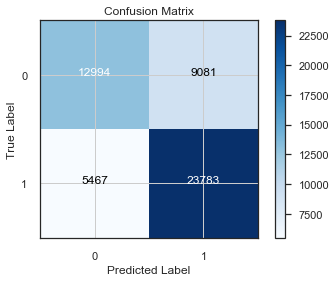

In [101]:
best_logreg = Pipeline([('pca', PCA(n_components = 89)), 
                       ('clf', LogisticRegression(C = 10, fit_intercept = True, penalty= 'l2'))])
best_logreg.fit(X_train, y_train)
lr_y_hat_train = best_logreg.predict(X_train)
lr_y_hat_test = best_logreg.predict(X_test)

print("Logistic regression score for train set: ", round(best_logreg.score(X_train, y_train),5))
print("Logistic regression score for test set: ", round(best_logreg.score(X_test, y_test), 5))
print("\nClassification Report")
print(classification_report(y_test, lr_y_hat_test))
plot_cf(y_test, lr_y_hat_test)

After hyperparameter tuning, the logistic regression performs just as well as the baseline logistic regression model.

### Model: Random Forest

The random forest model is a supervised learning algorithm that can be used for classification. It works by building multiple decision trees to predict which category a data point belongs to.

In [102]:
#build a random forest classifier with default parameters
pipe_rf = Pipeline([('pca', PCA(n_components = 79)), ('clf', RandomForestClassifier())])
pipe_rf.fit(X_train, y_train)
print('Random Forest score: ', round(pipe_rf.score(X_test, y_test),5))

C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest score:  0.65565


In [103]:
#Finding max tree depths of each tree 
[estimator.tree_.max_depth for estimator in pipe_rf.named_steps['clf'].estimators_]

[50, 48, 44, 55, 56, 59, 54, 50, 49, 44]

In [105]:
#use Gridsearch CV to find different parameters
rf_start = time.time()

pipe_rf = Pipeline([('pca', PCA(n_components = 79)),
                   ('clf', RandomForestClassifier())])
params_rf = [
    {'clf__n_estimators': [100],
    'clf__max_depth': [20,30,40],
    'clf__min_samples_split': [0.001, 0.01]}]
grid_rf = GridSearchCV(estimator = pipe_rf,
                      param_grid = params_rf,
                      cv = 5)
grid_rf.fit(X_train, y_train)

rf_end = time.time()
rf_best_score = grid_rf.best_score_
rf_best_params = grid_rf.best_params_

print(f"Time taken to run: {round((rf_end-rf_start)/60,2)} minutes")
print("Best accuracy: ", round(rf_best_score, 2))
print("Best parameters: ", rf_best_params)

Time taken to run: 39.05 minutes
Best accuracy:  0.7
Best parameters:  {'clf__max_depth': 30, 'clf__min_samples_split': 0.001, 'clf__n_estimators': 100}


Random Forest score for training set:  0.78518
Random Forest score for testing set:  0.7017

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.56      0.62     22075
           1       0.71      0.81      0.76     29250

   micro avg       0.70      0.70      0.70     51325
   macro avg       0.70      0.68      0.69     51325
weighted avg       0.70      0.70      0.70     51325



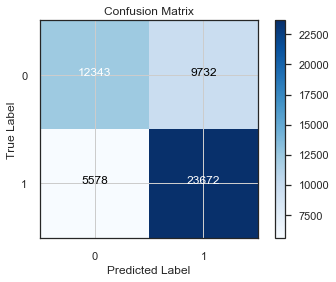

In [106]:
#run best random forest model with parameters from above
best_rf = Pipeline([('pca', PCA(n_components = 89)),
                   ('clf', RandomForestClassifier(max_depth = 30, min_samples_split = 0.001, n_estimators = 100))])
best_rf.fit(X_train, y_train)

rf_y_hat_train = best_rf.predict(X_train)
rf_y_hat_test = best_rf.predict(X_test)

print("Random Forest score for training set: ", round(best_rf.score(X_train, y_train),5))
print("Random Forest score for testing set: ", round(best_rf.score(X_test, y_test), 5))
print("\nClassification Report")
print(classification_report(y_test, rf_y_hat_test))
plot_cf(y_test, rf_y_hat_test)

After hyperparameter tuning, the accuracy of our model increased from 0.65 to 0.70 (weighed average f1 score). However, the difference in score between the training and testing set may point to over-fitting.

### Model : XGBoost

XGBoost is a type of gradient boosting algorithm. Similar to random forest, it is an ensemble algorithm that creates multiple decision trees, but with the help of gradient descent. Using gradient descent this way helps improve the model's performance by being able to classify data points that are difficult to classify.

In [84]:
#default XGBoost model 
pipe_xgb = Pipeline([('pca', PCA(n_components = 89)),
                    ('clf', xgb.XGBClassifier())])
pipe_xgb.fit(X_train, y_train)
print('XGBoost score: ', round(pipe_xgb.score(X_test, y_test), 5))

XGBoost score:  0.69746


In [87]:
#use GridSearchCV to find different hyperparameters
xgb_start = time.time()

pipe_xgb = Pipeline([('pca', PCA(n_components = 89)),
                    ('clf', xgb.XGBClassifier())])
params_xgb = [
    {'clf__n_estimators': [100],
    'clf__max_depth': [25, 35], 
    'clf__learning_rate': [0.01,0.1],
    'clf__min_child_weight': [20]}
]
grid_xgb = GridSearchCV(estimator= pipe_xgb, 
                       param_grid = params_xgb, 
                       cv = 5)
grid_xgb.fit(X_train, y_train)

xgb_end = time.time()
xgb_best_score = grid_xgb.best_score_
xgb_best_params = grid_xgb.best_params_
print(f"Time taken to run: {round((xgb_end-xgb_start)/60,1)} minutes.")
print("Best accuracy: ", round(xgb_best_score, 2))
print("Best parameters: ", xgb_best_params)

KeyboardInterrupt: 

XGBoost score for training set:  1.0 5
XGBoost score for testing set:  1.0 5

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.61      0.64     22075
           1       0.73      0.78      0.75     29250

   micro avg       0.71      0.71      0.71     51325
   macro avg       0.70      0.69      0.70     51325
weighted avg       0.70      0.71      0.70     51325



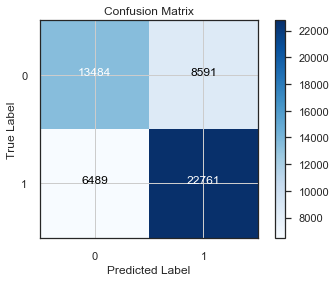

In [85]:
#best xgboost model
best_xgb = Pipeline([('pca', PCA(n_components = 89)),
                    ('clf', xgb.XGBClassifier(learning_rate = 0.1, max_depth = 35, min_child_weight = 100, n_estimators = 100,
                                             subsample = 0.7))])
best_xgb.fit(X_train, y_train)
xgb_y_hat_train = best_xgb.predict(X_train)
xgb_y_hat_test = best_xgb.predict(X_test)

print("XGBoost score for training set: ", round(best_xgb.score(X_train, y_train)),5)
print("XGBoost score for testing set: ", round(best_xgb.score(X_test, y_test)),5)
print("\nClassification Report")
print(classification_report(y_test, xgb_y_hat_test))
plot_cf(y_test, xgb_y_hat_test)

After hyperparameter tuning, the model's accuracy increased from 0.69 to 0.70, this is a small increase for a computionally intensive process like hyperparameter tuning. There also appears to be some overfitting from the difference between the training and testing set.

### Model: Logistic Regression with log-transformation

Previously, we ran a baseline logistic regression model without log transforming the positively skewed features. Now a log transformation will be applied to these features  to see if it improves the performance of the model.

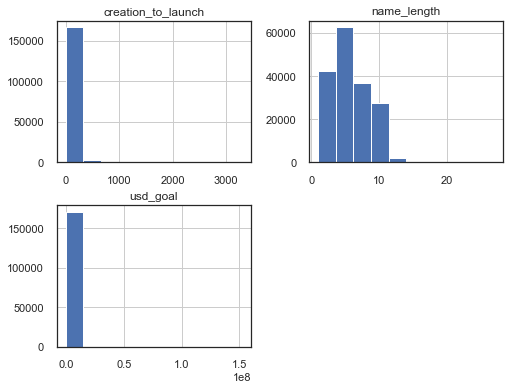

In [111]:
#assess the skewed features
cols_to_transform = ['creation_to_launch', 'name_length', 'usd_goal']
new_df[cols_to_transform].hist(figsize=(8,6));

In [112]:
#replace 0s with 0.01s and log transform
for col in cols_to_transform:
    new_df[col] = new_df[col].astype('float64').replace(0.0,0.01)
    new_df[col] = np.log(new_df[col])

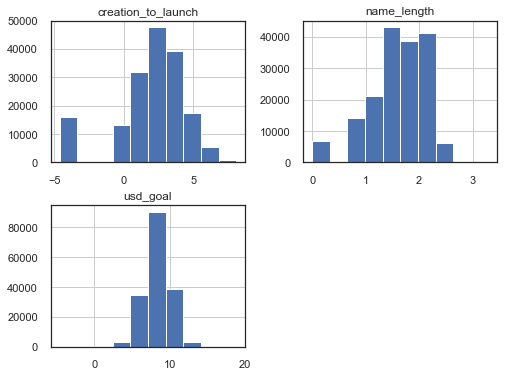

In [113]:
#check new distributions
new_df[cols_to_transform].hist(figsize=(8,6));

In [114]:
new_df.head()

state  blurb_length   usd_goal  name_length  creation_to_launch  \
id                                                                            
117424629       1          22.0   8.699515     2.302585            2.772589   
44517997        1          24.0   8.411833     2.197225            2.708050   
1196260883      0          20.0   8.431051     2.197225            3.583519   
647991009       1          19.0  11.267595     1.945910            5.891644   
2139543977      0          17.0   8.973078     1.386294            0.693147   

            campaign_length  category_art  category_comics  category_crafts  \
id                                                                            
117424629                30             1                0                0   
44517997                 40             1                0                0   
1196260883               29             0                0                0   
647991009                19             0                0                0   
2139543977               28             0                0                1   

            category_dance  ...  deadline_time_12am-2am  \
id                          ...                           
117424629                0  ...                       0   
44517997                 0  ...                       0   
1196260883               0  ...                       0   
647991009                0  ...                       0   
2139543977               0  ...                       1   

            deadline_time_12pm-2pm  deadline_time_2am-4am  \
id                                                          
117424629                        0                      0   
44517997                         1                      0   
1196260883                       0                      0   
647991009                        0                      0   
2139543977                       0                      0   

            deadline_time_2pm-4pm  deadline_time_4am-6am  \
id                                                         
117424629                       0                      0   
44517997                        0                      0   
1196260883                      1                      0   
647991009                       0                      0   
2139543977                      0                      0   

            deadline_time_4pm-6pm  deadline_time_6am-8am  \
id                                                         
117424629                       0                      1   
44517997                        0                      0   
1196260883                      0                      0   
647991009                       0                      0   
2139543977                      0                      0   

            deadline_time_6pm-8pm  deadline_time_8am-10am  \
id                                                          
117424629                       0                       0   
44517997                        0                       0   
1196260883                      0                       0   
647991009                       0                       0   
2139543977                      0                       0   

            deadline_time_8pm-10pm  
id                                  
117424629                        0  
44517997                         0  
1196260883                       0  
647991009                        0  
2139543977                       0  

[5 rows x 129 columns]

Now, the data can be prepared for machine learning modelling again

In [115]:
X_unscaled_log = new_df.drop('state', axis = 1)
y_log = new_df.state

In [116]:
#scale transformed data
scaler = StandardScaler()
X_log = pd.DataFrame(scaler.fit_transform(X_unscaled_log), columns = list(X_unscaled_log.columns))
X_log.head()

C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


blurb_length  usd_goal  name_length  creation_to_launch  campaign_length  \
0      0.640028  0.182382     1.218765            0.307275        -0.231556   
1      1.023322  0.015997     1.035820            0.282391         0.605323   
2      0.256734  0.027113     1.035820            0.619933        -0.315244   
3      0.065087  1.667666     0.599445            1.509844        -1.152124   
4     -0.318207  0.340601    -0.372254           -0.494466        -0.398932   

   category_art  category_comics  category_crafts  category_dance  \
0      2.861568        -0.200646        -0.185548       -0.133983   
1      2.861568        -0.200646        -0.185548       -0.133983   
2     -0.349459        -0.200646        -0.185548       -0.133983   
3     -0.349459        -0.200646        -0.185548       -0.133983   
4     -0.349459        -0.200646         5.389435       -0.133983   

   category_design  ...  deadline_time_12am-2am  deadline_time_12pm-2pm  \
0        -0.190283  ...               -0.301663               -0.251098   
1        -0.190283  ...               -0.301663                3.982506   
2        -0.190283  ...               -0.301663               -0.251098   
3        -0.190283  ...               -0.301663               -0.251098   
4        -0.190283  ...                3.314955               -0.251098   

   deadline_time_2am-4am  deadline_time_2pm-4pm  deadline_time_4am-6am  \
0               -0.31787              -0.328766              -0.310549   
1               -0.31787              -0.328766              -0.310549   
2               -0.31787               3.041677              -0.310549   
3               -0.31787              -0.328766              -0.310549   
4               -0.31787              -0.328766              -0.310549   

   deadline_time_4pm-6pm  deadline_time_6am-8am  deadline_time_6pm-8pm  \
0              -0.375352               4.026777              -0.358368   
1              -0.375352              -0.248338              -0.358368   
2              -0.375352              -0.248338              -0.358368   
3              -0.375352              -0.248338              -0.358368   
4              -0.375352              -0.248338              -0.358368   

   deadline_time_8am-10am  deadline_time_8pm-10pm  
0               -0.182356                -0.35111  
1               -0.182356                -0.35111  
2               -0.182356                -0.35111  
3               -0.182356                -0.35111  
4               -0.182356                -0.35111  

[5 rows x 128 columns]

In [117]:
#split into train, test sets
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size = 0.3, random_state = 123)

C:\Users\Hazel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression scores for training set:  0.7363
Logistic regression score for test set:  0.73629

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.65      0.68     22075
           1       0.75      0.80      0.78     29250

   micro avg       0.74      0.74      0.74     51325
   macro avg       0.73      0.73      0.73     51325
weighted avg       0.73      0.74      0.73     51325



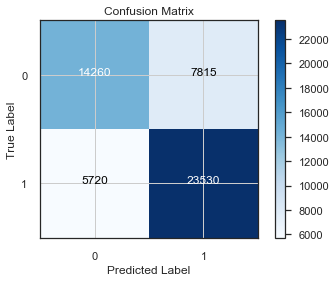

In [137]:
#fit logistic regression with default parameters
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#make predictions
lr_y_hat_train2 = logreg.predict(X_train)
lr_y_hat_test2 = logreg.predict(X_test)

#logistic regression scores
print("Logistic regression scores for training set: ", round(logreg.score(X_train, y_train), 5))
print("Logistic regression score for test set: ", round(logreg.score(X_test, y_test), 5))
print("\nClassification Report")
print(classification_report(y_test, lr_y_hat_test2))
plot_cf(y_test, lr_y_hat_test2)

Log-transforming the data increased the accuracy by 0.02 from 0.71 to 0.73 and got slightly better at predicting failures (from 0.59 to 0.65)

### Model: Random Forest without PCA

A random forest model will be created with log-transformed data but without PCA. This way a features importance list can be created.

In [95]:
#use GridsearchCV to test multiple parameters
rf_start2 = time.time()

rf2 = RandomForestClassifier(min_samples_split = 0.001, verbose = 2)
params_rf2 = [{'n_estimators': [200, 400],
               'max_depth': [20, 35] 
}]

grid_rf2 = GridSearchCV(estimator = rf2, param_grid = params_rf2, cv = 5)

grid_rf2.fit(X_train, y_train)

rf_end2 = time.time()

rf2_best_score = grid_rf2.best_score_
rf2_best_params = grid_rf2.best_params_

print(f"Time taken to run: {round((rf_end2 - rf_start2)/60, 2)} minutes")
print("Best accuracy: ", round(rf2_best_score, 2))
print("Best parameters: ", rf2_best_params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   56.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   54.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   55.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   51.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   56.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   16.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   15.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   17.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    7.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   51.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   28.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   28.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   28.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   29.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   30.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   57.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   56.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   57.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   59.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    8.5s finished


building tree 1 of 400
building tree 2 of 400


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.3min finished


Random Forest score for training set:  0.77996
Random Forest score for testing set:  0.74716

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.64      0.69     22075
           1       0.75      0.83      0.79     29250

   micro avg       0.75      0.75      0.75     51325
   macro avg       0.75      0.73      0.74     51325
weighted avg       0.75      0.75      0.74     51325



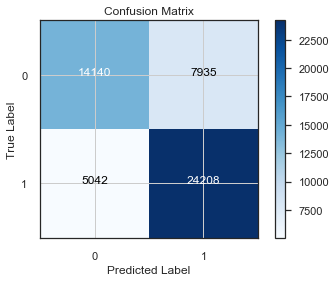

In [96]:
#best RF2 model
best_rf2 = RandomForestClassifier(max_depth = 35, min_samples_split = 0.001,  n_estimators = 400)
best_rf2.fit(X_train, y_train)

rf_y_hat_train2 = best_rf2.predict(X_train)
rf_y_hat_test2 = best_rf2.predict(X_test)

print("Random Forest score for training set: ", round(best_rf2.score(X_train, y_train), 5))
print("Random Forest score for testing set: ", round(best_rf2.score(X_test, y_test),5))
print("\nClassification Report")
print(classification_report(y_test, rf_y_hat_test2))
plot_cf(y_test, rf_y_hat_test2)

By log-transforming the data and increasing the number of estimators, the average weighted f1 score increased to 0.75. Overfitting doesn't appear to be an issue. Because PCA wasn't used for this model, we will be able see the feature importance.

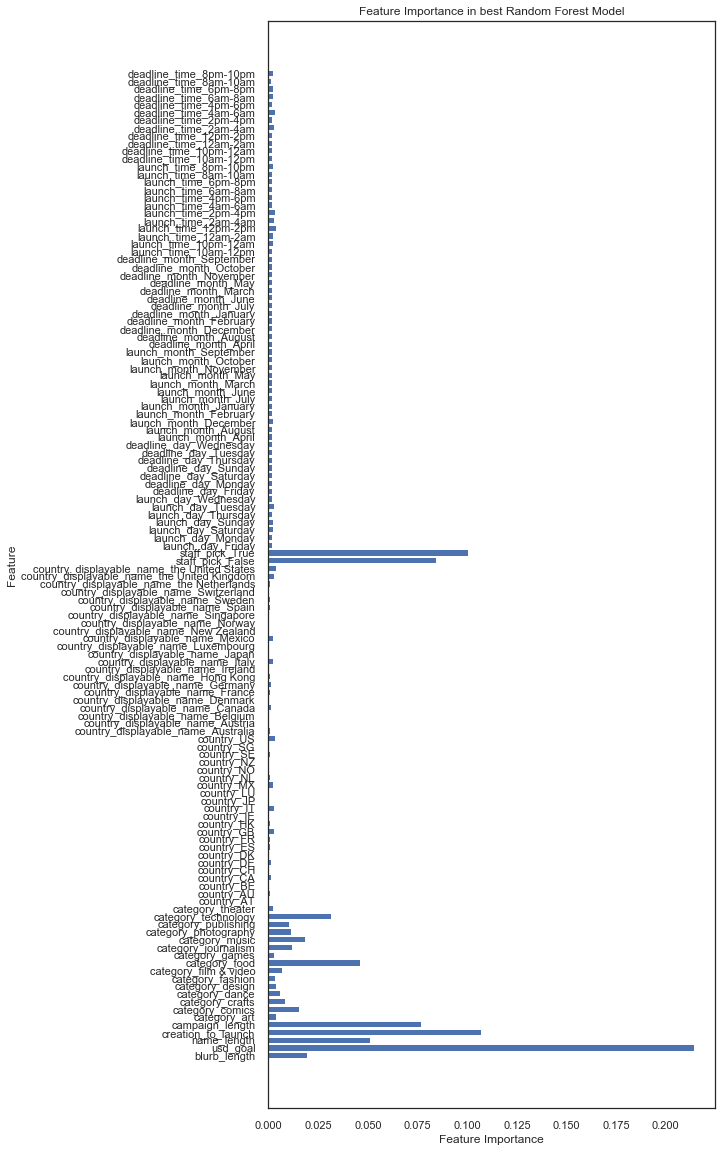

In [97]:
#plot feature importance
n_features = X_train.shape[1]
plt.figure(figsize=(8, 20))
plt.barh(range(n_features), best_rf2.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), X_train.columns.values)
plt.title('Feature Importance in best Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show();

As we can see from the plot above, goal size has the greatest importance, followed by number of days between creation to launch and whether or not the project was a staff pick.
Campaign length and name length are also important.
The type of project(category) isn't extremely important, although whether or not the project is a food project or technology project seems to be a little important.
Launch and deadline times don't seem to be important.
Country and origin of project isn't important either.

### Model: XGBoost without PCA

This XGBoost model will be run with log-transformed data and without PCA, to further improve upon the Random Forest model and to see there is a similarity in feature importance

In [89]:
#use GridsearchCV to test multiple parameters

xbg_start2 = time.time()
xgb2 = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 35, verbose = 2)

params_xgb2 = [
    {'n_estimators': [100, 200],
    'subsample': [0.7, 0.9],
    'min_child_weight': [100, 200]}
]

grid_xgb2 = GridSearchCV(estimator= xgb2, param_grid = params_xgb2, cv = 5)
grid_xgb2.fit(X_train, y_train)

xgb_end2 = time.time()

xgb_best_score2 = grid_xgb2.best_score_
xgb_best_params2 = grid_xgb2.best_params_

print(f"Time taken to run: {round((xgb_end2 - xgb_start2)/60, 2)} minutes")
print("Best accuracy: ",round(xgb_best_score2, 2))
print("Best parameters: ", xgb_best_params2)

KeyboardInterrupt: 

XGBoost score for training set:  0.77595
XGBoost score for testing set:  0.70619

Classification report
              precision    recall  f1-score   support

           0       0.68      0.61      0.64     22075
           1       0.73      0.78      0.75     29250

   micro avg       0.71      0.71      0.71     51325
   macro avg       0.70      0.69      0.70     51325
weighted avg       0.70      0.71      0.70     51325



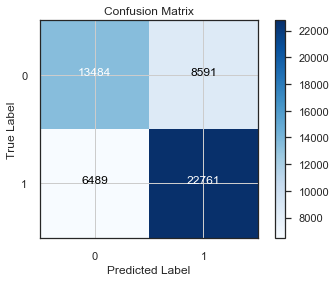

In [87]:
best_xgb2 = xgb.XGBClassifier(learning_rate = 0.1, max_depth=35, min_child_weight = 100, n_estimators = 100, subsample = 0.7)
best_xgb.fit(X_train, y_train)

xgb_y_hat_train2 = best_xgb.predict(X_train)
xgb_y_hat_test2 = best_xgb.predict(X_test)

print("XGBoost score for training set: ", round(best_xgb.score(X_train, y_train), 5))
print("XGBoost score for testing set: ", round(best_xgb.score(X_test, y_test), 5))
print("\nClassification report")
print(classification_report(y_test, xgb_y_hat_test2))
plot_cf(y_test, xgb_y_hat_test2)

In [98]:
#plot feature importance
n_features = X_train.shape[1]
plt.figure(figsize=(8,20))
plt.barh(range(n_features), best_xgb2.feature_importances_, align = 'center')

XGBoostError: need to call fit or load_model beforehand

<Figure size 576x1440 with 0 Axes>

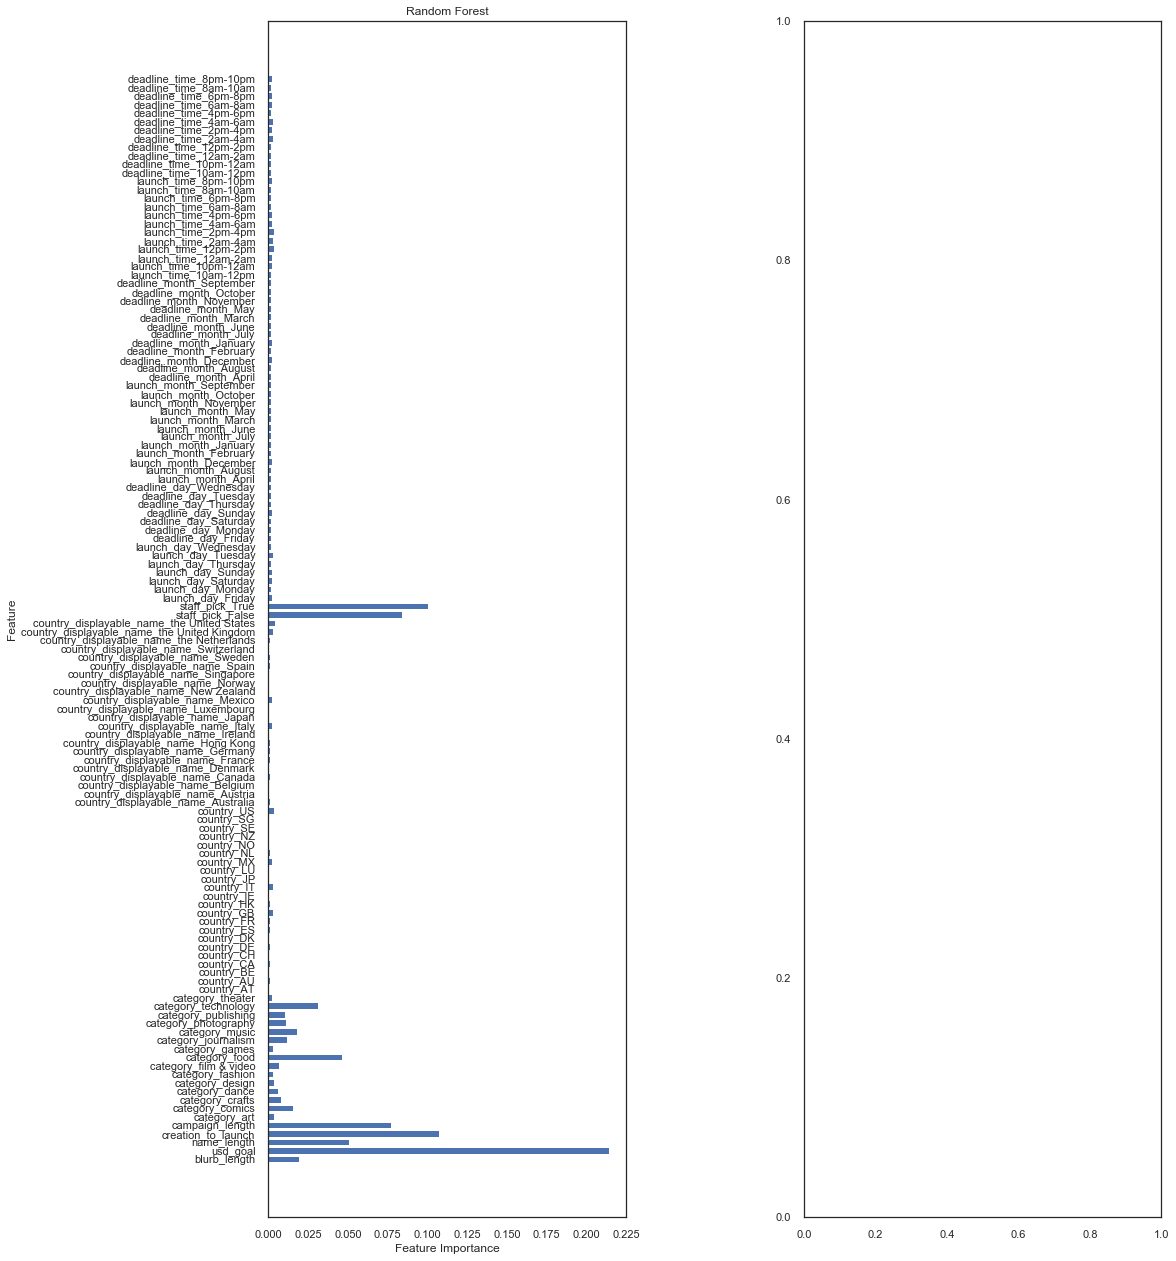

In [109]:
#compare XGBoost and Random Forest feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,22))
n_features = X_train.shape[1]
ax1.barh(range(n_features), best_rf2.feature_importances_, align = 'center')
ax1.set_yticks(np.arange(n_features))
ax1.set_yticklabels(X_train.columns.values)
ax1.set_title('Random Forest')
ax1.set_xlabel('Feature Importance')
ax1.set_ylabel('Feature')

#ax2.barh(range(n_features), best_xgb2.feature_importances_, align = 'center')
#ax2.yticks(np.arange(n_features), X_train.columns.values)
#ax2.title('XGBoost')
#ax2.xlabel('Feature Importance')
#ax2.ylabel('Feature')
fig.subplots_adjust(wspace = 0.5);

### Additional investigation of PCA

The graph of the feature importance above showed that the launch and deadline days, months and times are not important. So, filtering out unimportant features might be useful in creating a more efficient PCA model.

In [118]:
#drop columns with deadline
X_filtered = X_log[[c for c in X_log.columns if c[:8] != 'deadline']]

#drop columns with launch
X_filtered = X_log[[c for c in X_log.columns if c[:6] != 'launch']]

X_filtered.head()

blurb_length  usd_goal  name_length  creation_to_launch  campaign_length  \
0      0.640028  0.182382     1.218765            0.307275        -0.231556   
1      1.023322  0.015997     1.035820            0.282391         0.605323   
2      0.256734  0.027113     1.035820            0.619933        -0.315244   
3      0.065087  1.667666     0.599445            1.509844        -1.152124   
4     -0.318207  0.340601    -0.372254           -0.494466        -0.398932   

   category_art  category_comics  category_crafts  category_dance  \
0      2.861568        -0.200646        -0.185548       -0.133983   
1      2.861568        -0.200646        -0.185548       -0.133983   
2     -0.349459        -0.200646        -0.185548       -0.133983   
3     -0.349459        -0.200646        -0.185548       -0.133983   
4     -0.349459        -0.200646         5.389435       -0.133983   

   category_design  ...  deadline_time_12am-2am  deadline_time_12pm-2pm  \
0        -0.190283  ...               -0.301663               -0.251098   
1        -0.190283  ...               -0.301663                3.982506   
2        -0.190283  ...               -0.301663               -0.251098   
3        -0.190283  ...               -0.301663               -0.251098   
4        -0.190283  ...                3.314955               -0.251098   

   deadline_time_2am-4am  deadline_time_2pm-4pm  deadline_time_4am-6am  \
0               -0.31787              -0.328766              -0.310549   
1               -0.31787              -0.328766              -0.310549   
2               -0.31787               3.041677              -0.310549   
3               -0.31787              -0.328766              -0.310549   
4               -0.31787              -0.328766              -0.310549   

   deadline_time_4pm-6pm  deadline_time_6am-8am  deadline_time_6pm-8pm  \
0              -0.375352               4.026777              -0.358368   
1              -0.375352              -0.248338              -0.358368   
2              -0.375352              -0.248338              -0.358368   
3              -0.375352              -0.248338              -0.358368   
4              -0.375352              -0.248338              -0.358368   

   deadline_time_8am-10am  deadline_time_8pm-10pm  
0               -0.182356                -0.35111  
1               -0.182356                -0.35111  
2               -0.182356                -0.35111  
3               -0.182356                -0.35111  
4               -0.182356                -0.35111  

[5 rows x 97 columns]

Text(0, 0.5, 'Explained variance')

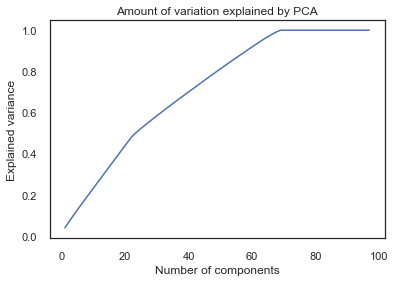

In [128]:
#build PCA
pca = PCA()
principal_comps = pca.fit_transform(X_filtered)
explained_var = np.cumsum(pca.explained_variance_ratio_)

#plot amount of variance explained by PCA with different number of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Similar to before, there is no clear elbow and few of the components explaining the majority of the variation

In [130]:
#create a list of PCA names
pca_cols = []
for i in range(1,98):
    pca_cols.append("PC" + str(i))

#Create a dataframe for prinicpal components
princ_comps_df = pd.DataFrame(principal_comps, columns = pca_cols)

In [131]:
#Add target (success/fail) to principal components dataframe
princ_comps_df = pd.concat([princ_comps_df, y_log.reset_index()], axis = 1)
princ_comps_df.drop('id', inplace = True, axis = 1)
princ_comps_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.234202 -0.083259 -0.321918 -0.237011  0.032132  0.196145 -0.014185   
1 -1.181425  1.292460  2.833721  0.629034  0.251211  0.542024 -0.098700   
2  3.348225  2.488875 -0.282362 -0.731483 -0.609694  0.767817  0.323082   
3  2.851830  4.286638  2.440689  0.409829 -0.042628  0.733421 -0.086072   
4  2.519465 -2.447672 -1.568760  5.327024 -1.880364  1.474020 -0.596605   

        PC8       PC9      PC10  ...          PC89          PC90  \
0 -0.058562 -0.051523 -0.083564  ... -2.604576e-15  6.605165e-16   
1 -0.307334  0.203485  0.263534  ...  8.866172e-16  1.500856e-16   
2  0.280878  0.297415 -0.160044  ...  4.171440e-16 -3.022179e-16   
3 -0.206910  0.482351  0.159685  ... -5.064983e-17 -1.196377e-16   
4 -0.516575  0.412361 -0.050743  ...  2.696847e-15  2.356970e-16   

           PC91          PC92          PC93          PC94          PC95  \
0 -1.132012e-16 -2.723345e-17 -1.334318e-15  1.687465e-15 -4.177166e-16   
1  3.847883e-16 -1.266584e-16  9.017313e-16 -5.254910e-16  1.402056e-16   
2 -2.163271e-16 -4.877690e-17 -3.533079e-18 -1.994744e-16  2.976876e-16   
3 -2.577464e-16 -3.257946e-16 -6.680814e-17 -4.341364e-17 -3.842876e-16   
4 -2.345044e-17  5.574556e-16  1.175266e-15 -1.332545e-15  4.413996e-16   

           PC96          PC97  state  
0  9.091002e-17  2.047618e-17      1  
1 -1.125519e-16  5.141219e-17      1  
2 -7.551890e-17 -1.204659e-17      0  
3  4.594092e-18 -1.991837e-17      1  
4 -1.357707e-16 -3.602824e-17      0  

[5 rows x 98 columns]

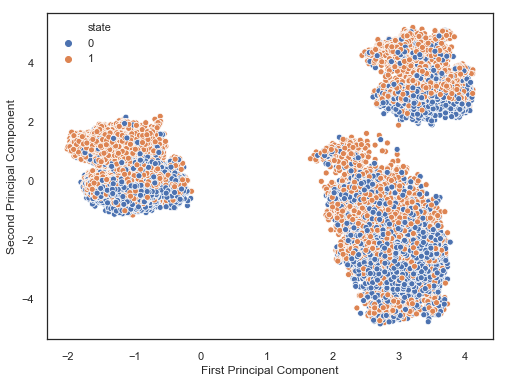

In [132]:
#plot the first two principal components, colored by target
plt.figure(figsize=(8,6))
sns.scatterplot(x = princ_comps_df.PC1, y = princ_comps_df.PC2, data = princ_comps_df, hue = 'state')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

The graph above reiterates the point that the first few components do not explain the variation very well. There is also a pattern seen in the data, but the reason is unclear. <br>

A final experiment will be conducted where the country will be dropped from the dataframe, as they do not explain much variance.

In [133]:
#drop country to see if this improves PCA
X_filtered = X_filtered[[c for c in X_filtered.columns if c[:7] != 'country']]
X_filtered.head()

blurb_length  usd_goal  name_length  creation_to_launch  campaign_length  \
0      0.640028  0.182382     1.218765            0.307275        -0.231556   
1      1.023322  0.015997     1.035820            0.282391         0.605323   
2      0.256734  0.027113     1.035820            0.619933        -0.315244   
3      0.065087  1.667666     0.599445            1.509844        -1.152124   
4     -0.318207  0.340601    -0.372254           -0.494466        -0.398932   

   category_art  category_comics  category_crafts  category_dance  \
0      2.861568        -0.200646        -0.185548       -0.133983   
1      2.861568        -0.200646        -0.185548       -0.133983   
2     -0.349459        -0.200646        -0.185548       -0.133983   
3     -0.349459        -0.200646        -0.185548       -0.133983   
4     -0.349459        -0.200646         5.389435       -0.133983   

   category_design  ...  deadline_time_12am-2am  deadline_time_12pm-2pm  \
0        -0.190283  ...               -0.301663               -0.251098   
1        -0.190283  ...               -0.301663                3.982506   
2        -0.190283  ...               -0.301663               -0.251098   
3        -0.190283  ...               -0.301663               -0.251098   
4        -0.190283  ...                3.314955               -0.251098   

   deadline_time_2am-4am  deadline_time_2pm-4pm  deadline_time_4am-6am  \
0               -0.31787              -0.328766              -0.310549   
1               -0.31787              -0.328766              -0.310549   
2               -0.31787               3.041677              -0.310549   
3               -0.31787              -0.328766              -0.310549   
4               -0.31787              -0.328766              -0.310549   

   deadline_time_4pm-6pm  deadline_time_6am-8am  deadline_time_6pm-8pm  \
0              -0.375352               4.026777              -0.358368   
1              -0.375352              -0.248338              -0.358368   
2              -0.375352              -0.248338              -0.358368   
3              -0.375352              -0.248338              -0.358368   
4              -0.375352              -0.248338              -0.358368   

   deadline_time_8am-10am  deadline_time_8pm-10pm  
0               -0.182356                -0.35111  
1               -0.182356                -0.35111  
2               -0.182356                -0.35111  
3               -0.182356                -0.35111  
4               -0.182356                -0.35111  

[5 rows x 53 columns]

Text(0, 0.5, 'Explained variance')

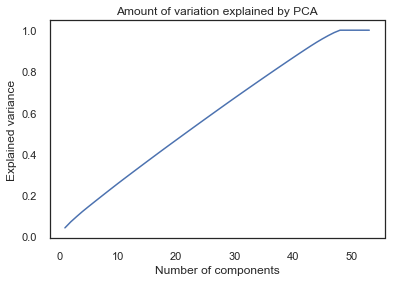

In [134]:
#build PCA
pca = PCA()
princ_comps = pca.fit_transform(X_filtered)
explained_var = np.cumsum(pca.explained_variance_ratio_)

#plot amount of variance explained by PCA with different number of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Unfortunately, the same pattern shows up.

### Potential Future Work

Further investigation into PCA, or using 68 components instead of 89 as this only had a slightly lower accuracy scores <br>
Further hyperparmater tuning for Random Forest and XGBoost.

# Conclusion and Recommendations

### Choosing the final model

In [138]:
#extract the weighted average precision, recall and test scores from each of the best model
# Logistic regression
lr_test_precision, lr_test_recall, lr_test_f1score, lr_test_support = precision_recall_fscore_support(y_test, lr_y_hat_test2, average='weighted')
lr_train_precision, lr_train_recall, lr_train_f1score, lr_train_support = precision_recall_fscore_support(y_train, lr_y_hat_train2, average='weighted')
# Random Forest
rf_test_precision, rf_test_recall, rf_test_f1score, rf_test_support = precision_recall_fscore_support(y_test, rf_y_hat_test2, average='weighted')
rf_train_precision, rf_train_recall, rf_train_f1score, rf_train_support = precision_recall_fscore_support(y_train, rf_y_hat_train2, average='weighted')
# XGBoost
xgb_test_precision, xgb_test_recall, xgb_test_f1score, xgb_test_support = precision_recall_fscore_support(y_test, xgb_y_hat_test2, average='weighted')
xgb_train_precision, xgb_train_recall, xgb_train_f1score, xgb_train_support = precision_recall_fscore_support(y_train, xgb_y_hat_train2, average='weighted')

In [139]:
#logistic regression results
lr_results = {'Precision': [lr_train_precision, lr_test_precision], 'Recall': [lr_train_recall, lr_test_recall], 
             'F1 Score': [lr_train_f1score, lr_test_f1score]}
lr_results = pd.DataFrame(lr_results, index = ['Train', 'Test'])
print('Best Logistic Regression results (Model 5)')
lr_results

Best Logistic Regression results (Model 5)


Precision    Recall  F1 Score
Train   0.735024  0.736299  0.734360
Test    0.734780  0.736288  0.734279

In [140]:
#random forest results
rf_results = {'Precision': [rf_train_precision, rf_test_precision], 'Recall': [rf_train_recall, rf_test_recall],
             'F1 Score': [rf_train_f1score, rf_test_f1score]}
rf_results = pd.DataFrame(rf_results, index = ['Train', 'Test'])
print('Best Random Forest results (Model 6)')
rf_results

Best Random Forest results (Model 6)


Precision    Recall  F1 Score
Train   0.780291  0.779963  0.777587
Test    0.746259  0.747160  0.744253

In [141]:
#xgboost results
xgb_results = {'Precision': [xgb_train_precision, xgb_test_precision], 'Recall': [xgb_train_recall, xgb_test_recall],
              'F1 Score': [xgb_train_f1score, xgb_test_f1score]}
xgb_results = pd.DataFrame(xgb_results, index = ['Train', 'Test'])
xgb_results

Precision    Recall  F1 Score
Train   0.775430  0.775955  0.774287
Test    0.704103  0.706186  0.703938

### Final model evaluation and interpretation

Each model was able to achieve an accuracy of between 70%-74% after parameter tuning. Although it was easy to achieve an accuracy of 70%, after parameter tuning the accuracy only increased by a small amount. It is possible that the large amount of data only in two categories meant that there was enough data to perform a simple model (like basic logistic regression). <br>

The final model choosen was the Random Forest model with an F1 score of 0.744. <br>

Interestingly, each model performed did not do a good job of predicting failures compared to successful projects, with a lower true negative than true positive rate. It is likely that things that cause projects to fail are outside the scope of the given data, eg. poor marketing, insufficient updates or not not replying to potential backers.


In [143]:
r_cf = confusion_matrix(y_test, rf_y_hat_test2)
print('\nEvaluation of final model')
print('\nIf the true value is failure, what proportion does the model correctly predict as a failure? \nThe true negative rate is is:\n'
     ,round(r_cf[0][0]/sum(r_cf[0]),4))
print('\nIf the true value is a success, what proportion does the model correctly predict a success? \nThe true positve rate is:\n',
     round(r_cf[1][1]/sum(r_cf[1]), 4))
print('\nIf the model predicts a failure, what proportion are actually failures? \n(Negative prediction value:\n)', 
      round(r_cf[0][0]/sum(r_cf[:, 0]),4))
print('\nIf the model predicts a success, what proportion are actually successful? \n(Positive prediction value:\n)', 
      round(r_cf[1][1]/sum(r_cf[:, 1]), 4))


Evaluation of final model

If the true value is failure, what proportion does the model correctly predict as a failure? 
The true negative rate is is:
 0.6405

If the true value is a success, what proportion does the model correctly predict a success? 
The true positve rate is:
 0.8276

If the model predicts a failure, what proportion are actually failures? 
(Negative prediction value:
) 0.7371

If the model predicts a success, what proportion are actually successful? 
(Positive prediction value:
) 0.7531


### Recommendations

Some of the featues had a positive effect on the sucess rate and/or the amount of money received (as deduced by feature importance and feature engineering): <br>

Most Important: <br>
1. Smaller project goals <br>
2. Being choosen as a staff pick <br>
3. Shorter campaigns <br>
4. Longer campaign to launch duration <br>
5. Comics, dance and games projects <br>

Least Important: <br>
1. Projects from Hong Kong <br>
2. Launching a project on a Tuesday (this is the most popular day to launch a project, so beware competition) <br>
3. Name length and blurb length (shorter blurbs and longer names are preferred) <br>
4. Film and music projects are most popular categories on site and are fairly successful <br>
5. Launching a campaign between 12pm and 2pm UTC (related to country of origin) <br>

The factors that had the most negative effect on success rate and/or the amount of money receieved are: <br>

Most Important: <br>
1. Larger goals <br>
2. Longer campaigns <br>
3. Food and journalism projects <br>
4. Projects from Italy <br>

Least Important: <br>
1. Launching on the weekend <br>
2. Launching in July or December <br>
3. Launching between 4am and 6am UTC <br>

Overall, Kickstarter is well-suited for smaller, high quality projects(particularly comics, dances and games) and less-suited to larger projects like journalism and food projects.